In [6]:
import glob
import os
import pandas as pd
import matplotlib as plt
import matplotlib.style
plt.style.use('dark_background')

In [7]:
tgt_list = ['ja','zh']
# tgt = 'ja'
data_diff_type_list = ['del','add','all']
# data_diff_type = 'all'
label_orientation_list = ["direct","intense","intense","intense","intense","perspective"]
# label_orientation = "direct"
intense_orientation_list =['','all','downgrader','specific','irony','']
# intense_orientation = "all"

In [8]:
def get_testresult_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation):
    df = pd.DataFrame()
    for iter_cnt in range(20):
        if label_orientation == 'intense':
            test_result_dir = f'{ver_dir}test/{tgt}/{data_diff_type}/{label_orientation}/{intense_orientation}/{iter_cnt}/'
        else:
            test_result_dir = f'{ver_dir}test/{tgt}/{data_diff_type}/{label_orientation}/{iter_cnt}/'
        test_result_file_name = 'metric.csv'
        tmp = pd.read_csv(test_result_dir+test_result_file_name,header=None,index_col=0, names=[str(iter_cnt)])
#         display(tmp)
        df = pd.concat([df,tmp],axis=1)
    
    print('{} {} {} {} {}'.format(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation))    
    display(df.T.describe())

    df.T.plot.box(ylim=(0,1),title='{} {} {} {} {}'.format(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation))
        

In [9]:
def get_trainloss_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation):
    df = pd.DataFrame()
    for iter_cnt in range(20):
        if label_orientation == 'intense':
            log_dir = f'{ver_dir}log/{tgt}/{data_diff_type}/{label_orientation}/{intense_orientation}/{iter_cnt}/'
        else:
            log_dir = f'{ver_dir}log/{tgt}/{data_diff_type}/{label_orientation}/{iter_cnt}/'
        f_path = glob.glob(f'{log_dir}*')[0]
        tmp = pd.read_csv(f_path)
#         print(tmp)
        tmp = tmp['train_loss'].str[7:13]
        tmp = tmp.astype({'train_loss': 'float32'})
#         display(tmp['train_loss'].str[7:14])
        df = pd.concat([df,tmp],axis=1)
    df = df.set_axis(list(range(20)),axis=1)
    
#     print('{} {} {} {} {}'.format(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation))
#     display(df)
    
    df.plot(title='{} {} {} {} {}'.format(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation))

In [10]:
def get_valf1_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation):
    df = pd.DataFrame()
    for iter_cnt in range(20):
        if label_orientation == 'intense':
            log_dir = f'{ver_dir}log/{tgt}/{data_diff_type}/{label_orientation}/{intense_orientation}/{iter_cnt}/'
        else:
            log_dir = f'{ver_dir}log/{tgt}/{data_diff_type}/{label_orientation}/{iter_cnt}/'
        f_path = glob.glob(f'{log_dir}*')[0]
        tmp = pd.read_csv(f_path)
        tmp = tmp['f1']
#         tmp = tmp.astype({'train_loss': 'float32'})
#         display(tmp['train_loss'].str[7:14])
        df = pd.concat([df,tmp],axis=1)
    df = df.set_axis(list(range(20)),axis=1)
    
#     print('{} {} {} {} {}'.format(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation))
#     display(df)
    
    df.plot(title='{} {} {} {} {}'.format(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation))

In [11]:
def main_testresult(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list):
    for tgt in tgt_list:
        for data_diff_type in data_diff_type_list:
            for label_orientation,intense_orientation in zip(label_orientation_list,intense_orientation_list):
                if (tgt == 'zh') and (label_orientation == "perspective"):
                    continue
                if (tgt == 'zh') and (label_orientation == "intense") and (intense_orientation in ['downgrader','irony']):
                    continue
                if (tgt == 'zh') and (data_diff_type == 'del') and (label_orientation == "intense"):
                    continue
                if (tgt == 'zh') and (label_orientation == "intense") and (intense_orientation in ['downgrader','irony']):
                    continue
                if (tgt == 'ja') and (data_diff_type in ['del','add']) and (label_orientation == "intense") and (intense_orientation in ['downgrader','irony']):
                    continue
                get_testresult_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)
def main_trainloss(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list):
    for tgt in tgt_list:
        for data_diff_type in data_diff_type_list:
            for label_orientation,intense_orientation in zip(label_orientation_list,intense_orientation_list):
                if (tgt == 'zh') and (label_orientation == "perspective"):
                    continue
                if (tgt == 'zh') and (label_orientation == "intense") and (intense_orientation in ['downgrader','irony']):
                    continue
                if (tgt == 'zh') and (data_diff_type == 'del') and (label_orientation == "intense"):
                    continue
                if (tgt == 'zh') and (label_orientation == "intense") and (intense_orientation in ['downgrader','irony']):
                    continue
                if (tgt == 'ja') and (data_diff_type in ['del','add']) and (label_orientation == "intense") and (intense_orientation in ['downgrader','irony']):
                    continue
                get_trainloss_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)
            
                     
def main_valf1(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list):
    for tgt in tgt_list:
        for data_diff_type in data_diff_type_list:
            for label_orientation,intense_orientation in zip(label_orientation_list,intense_orientation_list):
                if (tgt == 'zh') and (label_orientation == "perspective"):
                    continue
                if (tgt == 'zh') and (label_orientation == "intense") and (intense_orientation in ['downgrader','irony']):
                    continue
                if (tgt == 'zh') and (data_diff_type == 'del') and (label_orientation == "intense"):
                    continue
                if (tgt == 'zh') and (label_orientation == "intense") and (intense_orientation in ['downgrader','irony']):
                    continue
                if (tgt == 'ja') and (data_diff_type in ['del','add']) and (label_orientation == "intense") and (intense_orientation in ['downgrader','irony']):
                    continue
                get_valf1_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)


def main_testresult_005(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list):
    for tgt in tgt_list:
        for data_diff_type in data_diff_type_list:
            for label_orientation,intense_orientation in zip(label_orientation_list,intense_orientation_list):
                if (tgt == 'zh') and (label_orientation == "perspective"):
                    continue
                if (tgt == 'zh') and (label_orientation == "intense") and (intense_orientation in ['downgrader']):
                    continue
                if (tgt == 'zh') and (data_diff_type == 'del'):
                    continue
                if (tgt == 'ja') and (data_diff_type in ['del']) and (label_orientation == "intense") and (intense_orientation in ['downgrader']):
                    continue
                get_testresult_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)

def main_trainloss_005(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list):
    for tgt in tgt_list:
        for data_diff_type in data_diff_type_list:
            for label_orientation,intense_orientation in zip(label_orientation_list,intense_orientation_list):
                if (tgt == 'zh') and (label_orientation == "perspective"):
                    continue
                if (tgt == 'zh') and (label_orientation == "intense") and (intense_orientation in ['downgrader']):
                    continue
                if (tgt == 'zh') and (data_diff_type == 'del'):
                    continue
                if (tgt == 'ja') and (data_diff_type in ['del']) and (label_orientation == "intense") and (intense_orientation in ['downgrader']):
                    continue
                get_trainloss_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)
            
                     
def main_valf1_005(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list):
    for tgt in tgt_list:
        for data_diff_type in data_diff_type_list:
            for label_orientation,intense_orientation in zip(label_orientation_list,intense_orientation_list):
                if (tgt == 'zh') and (label_orientation == "perspective"):
                    continue
                if (tgt == 'zh') and (label_orientation == "intense") and (intense_orientation in ['downgrader']):
                    continue
                if (tgt == 'zh') and (data_diff_type == 'del'):
                    continue
                if (tgt == 'ja') and (data_diff_type in ['del']) and (label_orientation == "intense") and (intense_orientation in ['downgrader']):
                    continue
                get_valf1_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)
            
def main_testresult_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list):
    for tgt in tgt_list:
        for data_diff_type in data_diff_type_list:
            for label_orientation,intense_orientation in zip(label_orientation_list,intense_orientation_list):
                # VER.>=007
                if (tgt == 'ja') and (data_diff_type in ['add']) and (label_orientation == "intense") and (intense_orientation in ['specific']):
                    continue
                
                if (tgt == 'zh') and (label_orientation == "perspective"):
                    continue
                if (tgt == 'zh') and (label_orientation == "intense") and (intense_orientation in ['downgrader']):
                    continue
                if (tgt == 'zh') and (data_diff_type == 'del'):
                    continue
                if (tgt == 'ja') and (data_diff_type in ['del']) and (label_orientation == "intense") and (intense_orientation in ['downgrader']):
                    continue
                get_testresult_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)

def main_trainloss_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list):
    for tgt in tgt_list:
        for data_diff_type in data_diff_type_list:
            for label_orientation,intense_orientation in zip(label_orientation_list,intense_orientation_list):
                # VER.>=007
                if (tgt == 'ja') and (data_diff_type in ['add']) and (label_orientation == "intense") and (intense_orientation in ['specific']):
                    continue
                
                if (tgt == 'zh') and (label_orientation == "perspective"):
                    continue
                if (tgt == 'zh') and (label_orientation == "intense") and (intense_orientation in ['downgrader']):
                    continue
                if (tgt == 'zh') and (data_diff_type == 'del'):
                    continue
                if (tgt == 'ja') and (data_diff_type in ['del']) and (label_orientation == "intense") and (intense_orientation in ['downgrader']):
                    continue
                get_trainloss_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)
            
                     
def main_valf1_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list):
    for tgt in tgt_list:
        for data_diff_type in data_diff_type_list:
            for label_orientation,intense_orientation in zip(label_orientation_list,intense_orientation_list):
                # VER.>=007
                if (tgt == 'ja') and (data_diff_type in ['add']) and (label_orientation == "intense") and (intense_orientation in ['specific']):
                    continue
                
                if (tgt == 'zh') and (label_orientation == "perspective"):
                    continue
                if (tgt == 'zh') and (label_orientation == "intense") and (intense_orientation in ['downgrader']):
                    continue
                if (tgt == 'zh') and (data_diff_type == 'del'):
                    continue
                if (tgt == 'ja') and (data_diff_type in ['del']) and (label_orientation == "intense") and (intense_orientation in ['downgrader']):
                    continue
                get_valf1_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)
                        

# 002_add_word

/home/yamashita/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


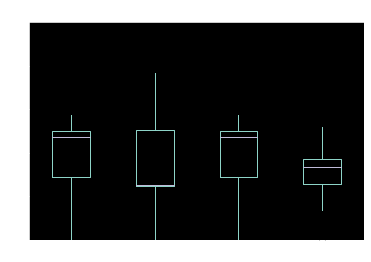

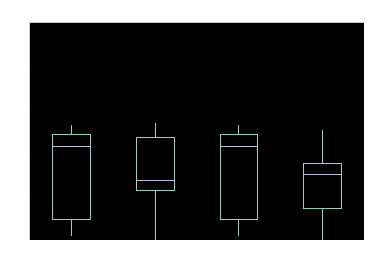

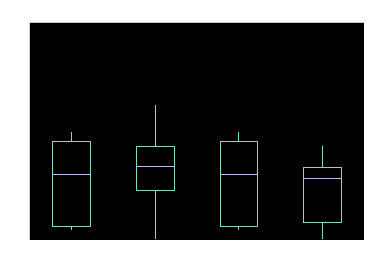

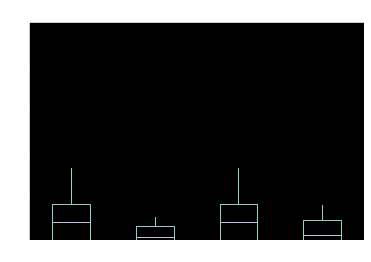

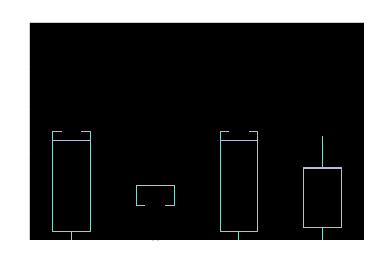

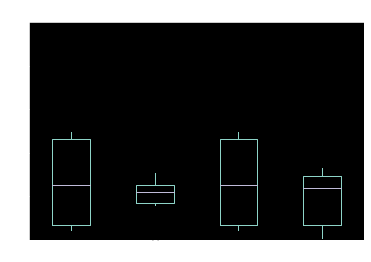

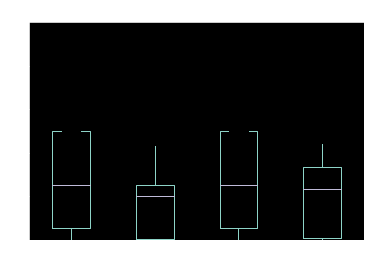

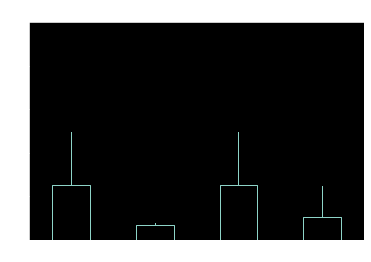

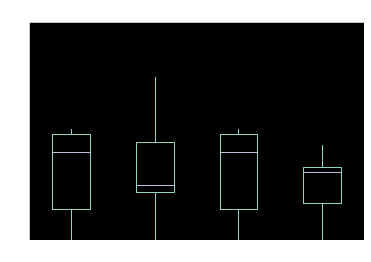

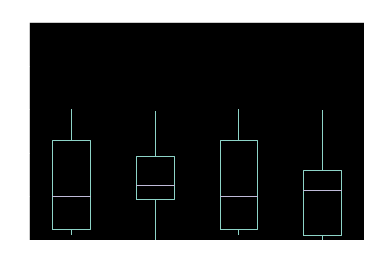

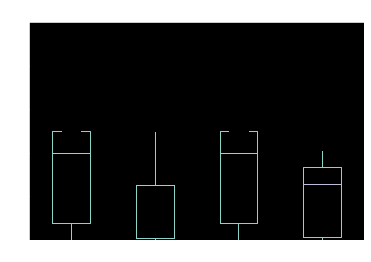

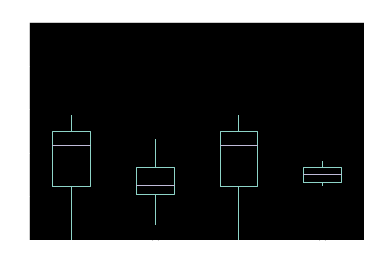

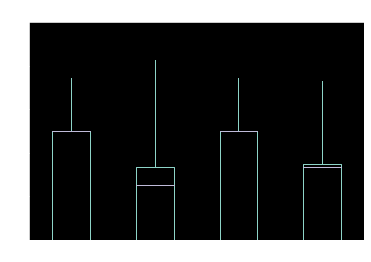

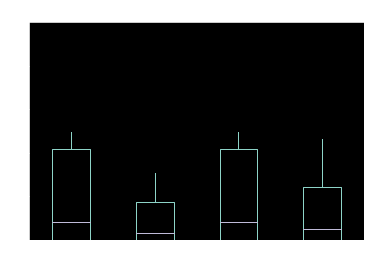

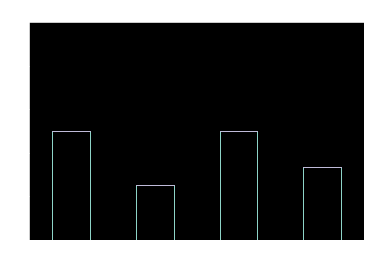

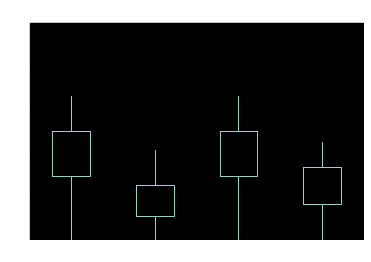

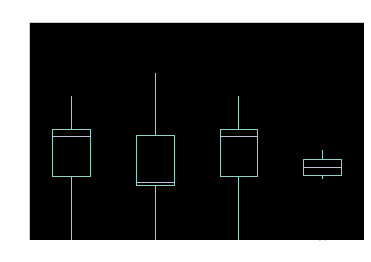

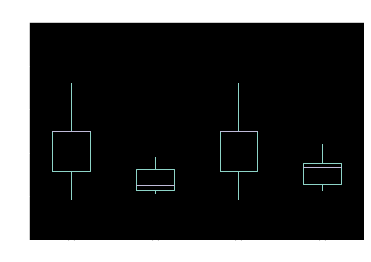

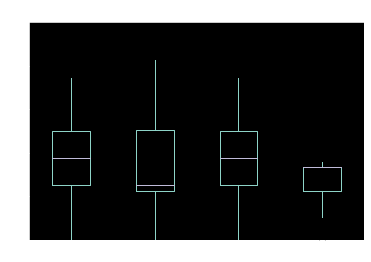

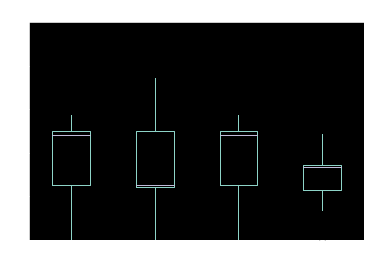

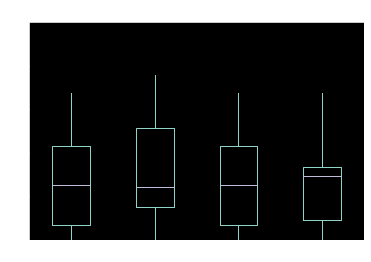

In [7]:
ver_dir = 'culdiff_save/002_add_word/'
main_testresult(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

/home/yamashita/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


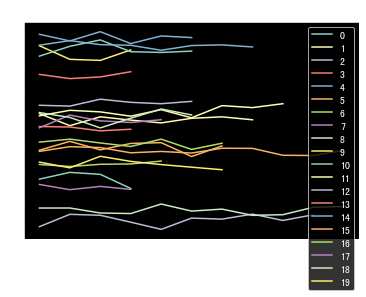

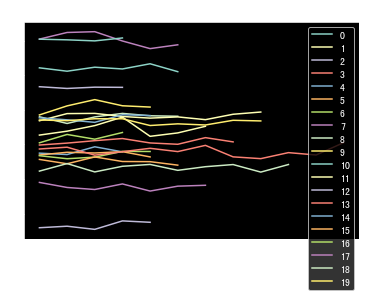

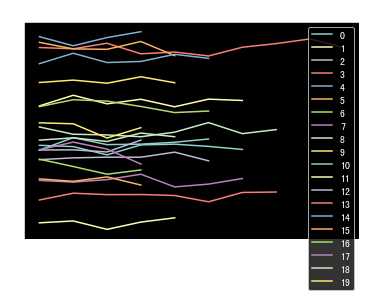

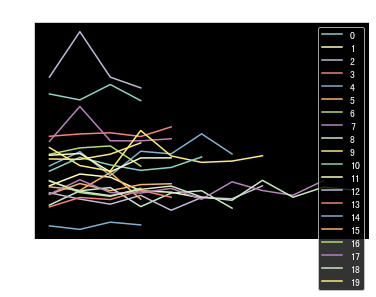

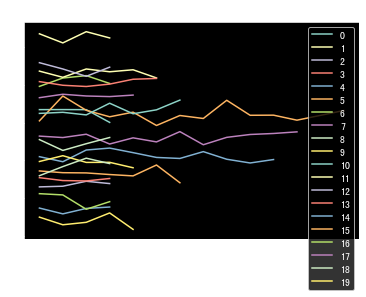

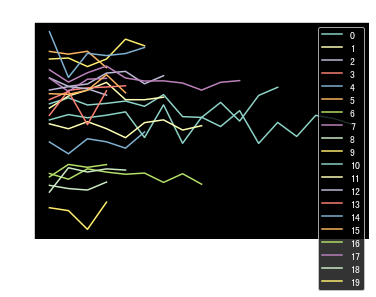

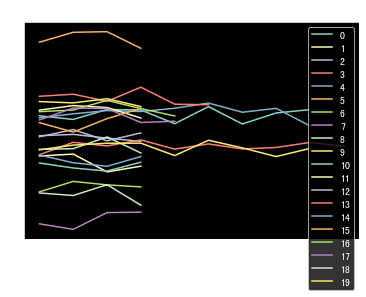

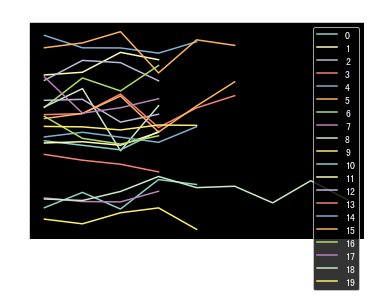

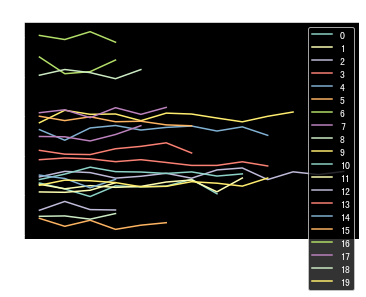

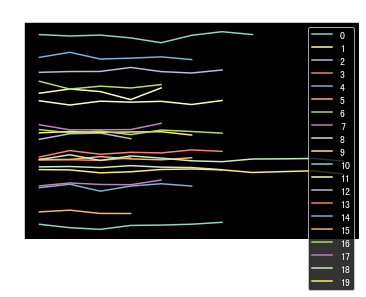

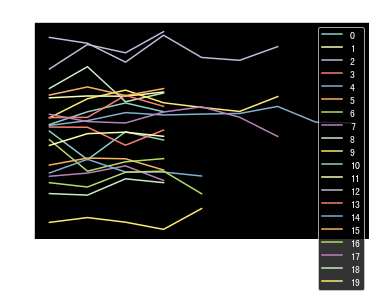

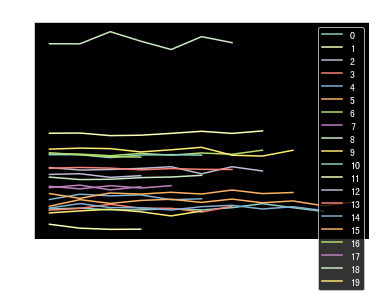

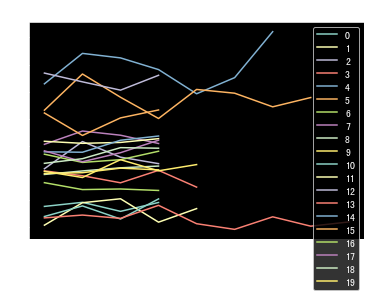

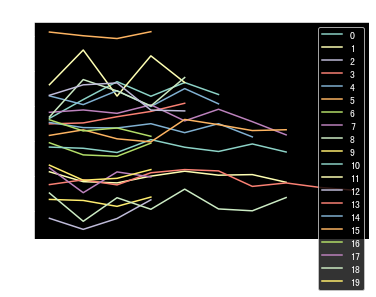

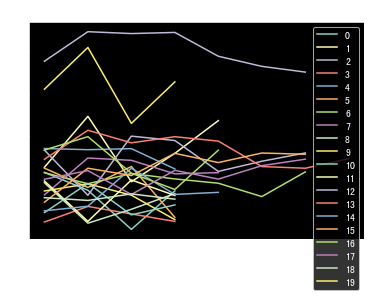

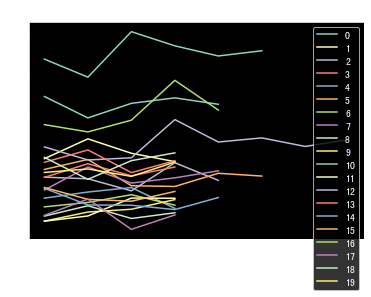

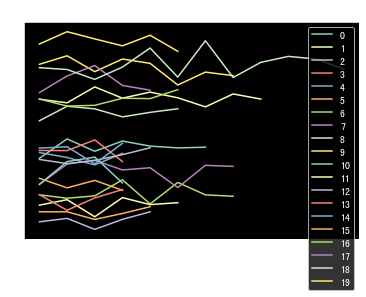

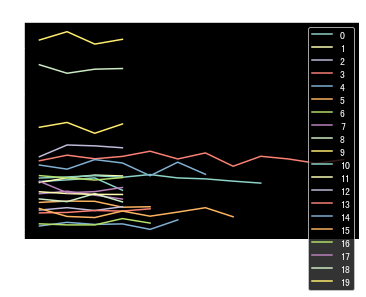

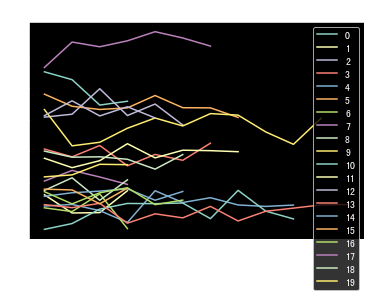

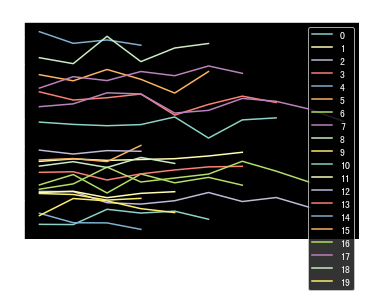

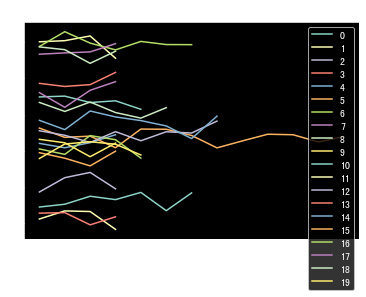

In [8]:
main_trainloss(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

/home/yamashita/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


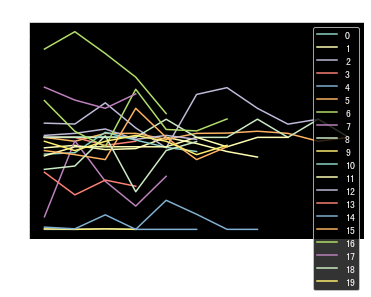

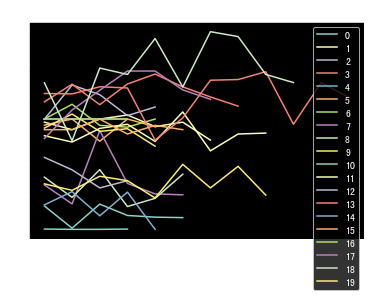

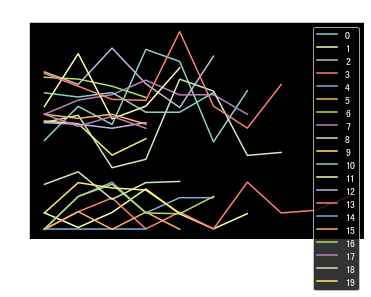

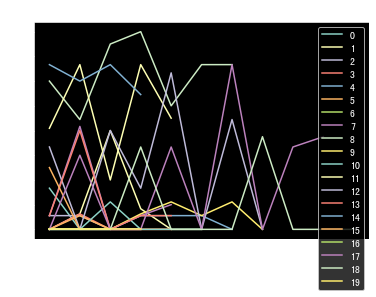

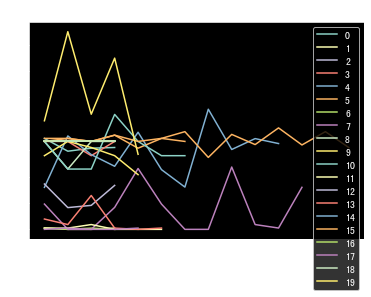

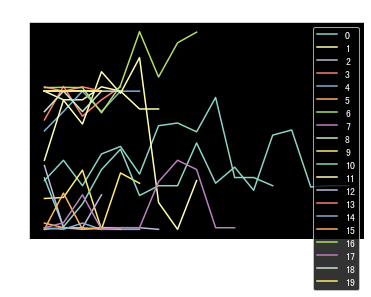

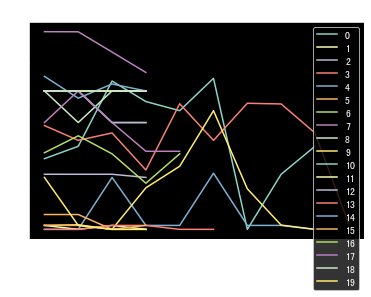

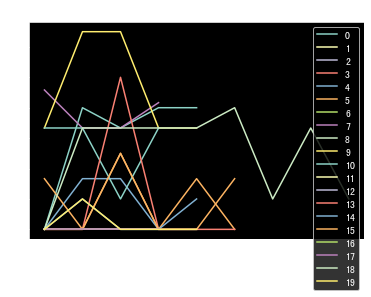

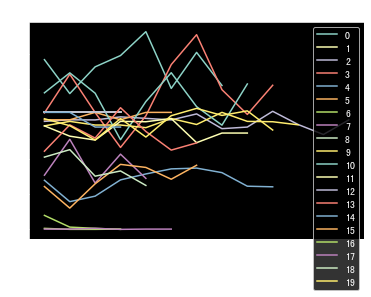

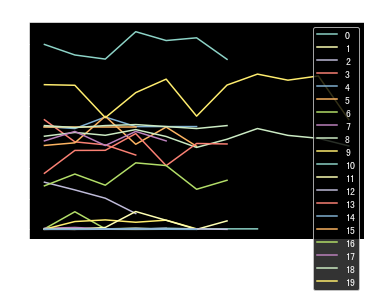

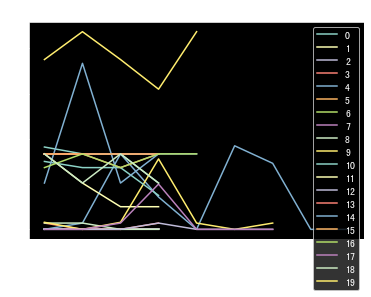

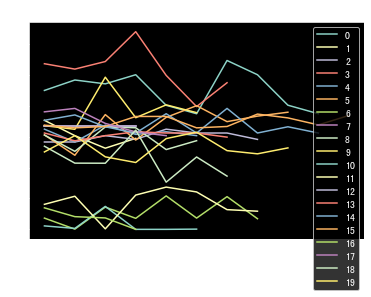

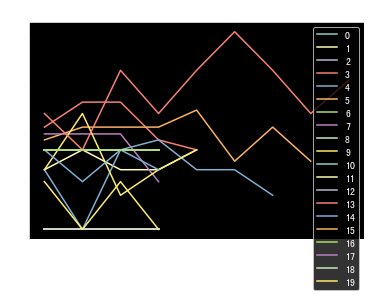

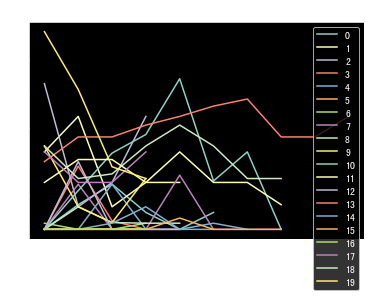

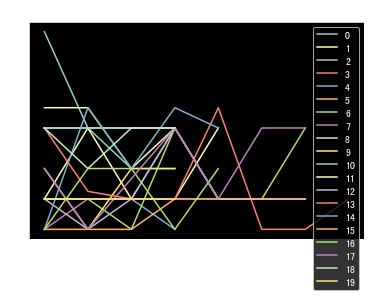

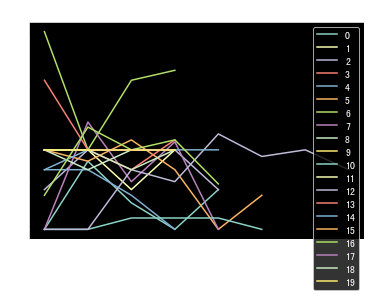

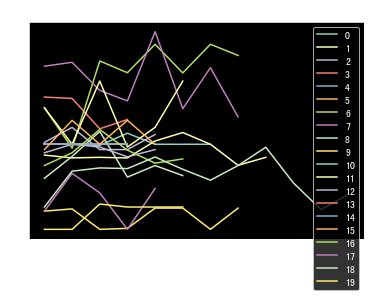

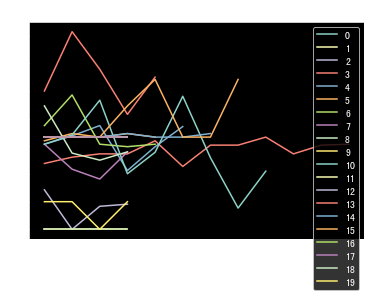

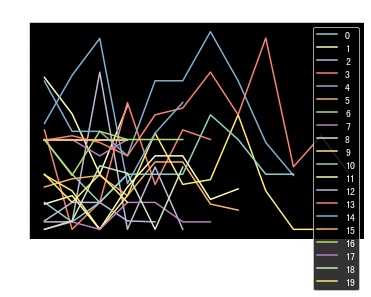

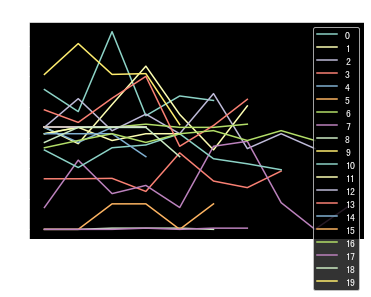

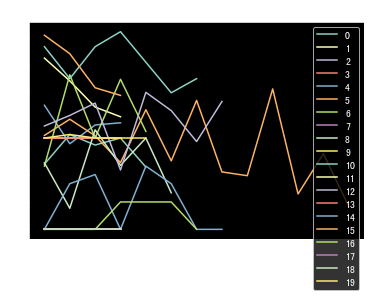

In [9]:
main_valf1(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

In [10]:

# ver_dir, tgt, data_diff_type, label_orientation, intense_orientation = 'culdiff_save/002_add_word/', 'ja', 'del', 'direct', ''
# get_testresult_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)
# get_trainloss_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)
# get_valf1_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)

# 004_add_word_lesslr

/home/yamashita/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


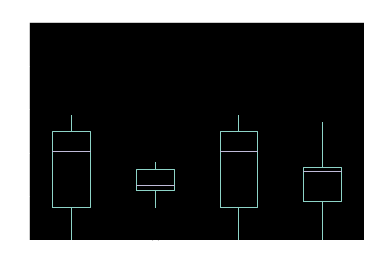

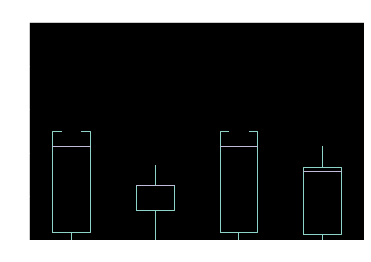

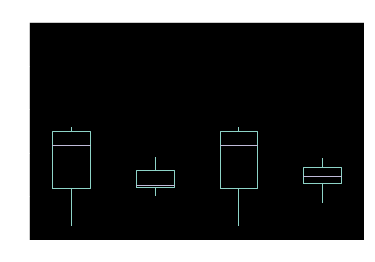

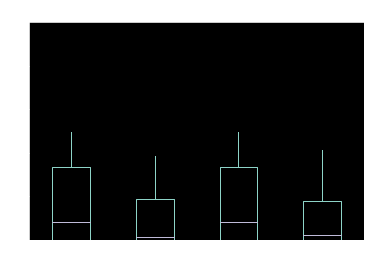

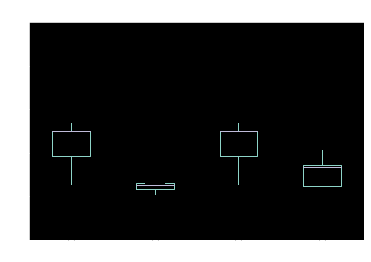

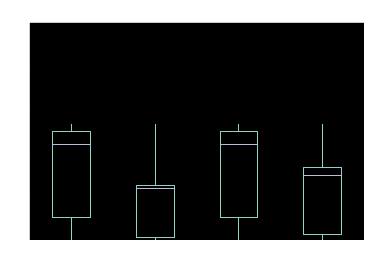

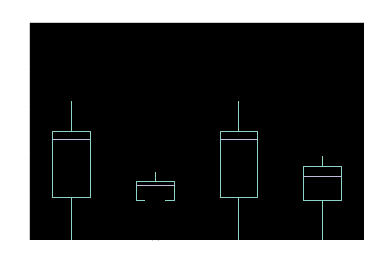

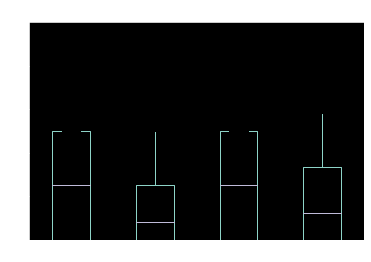

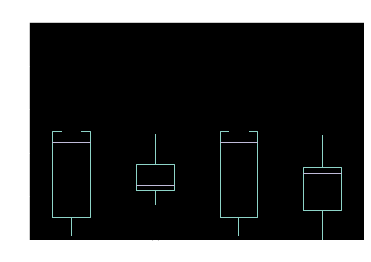

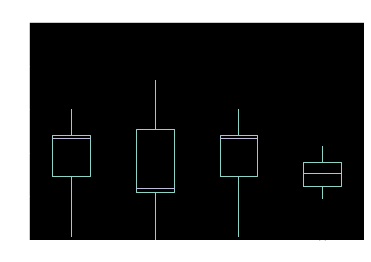

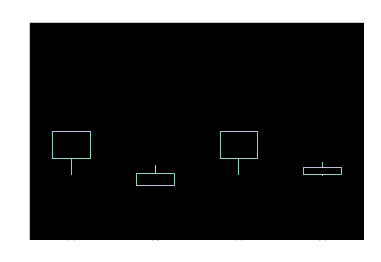

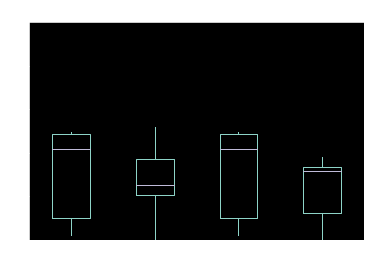

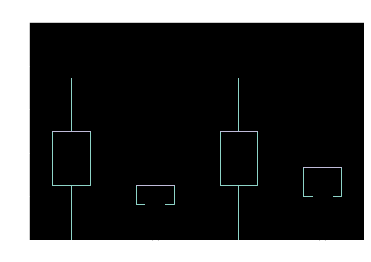

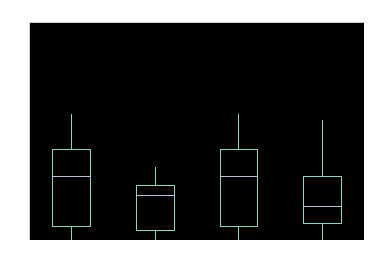

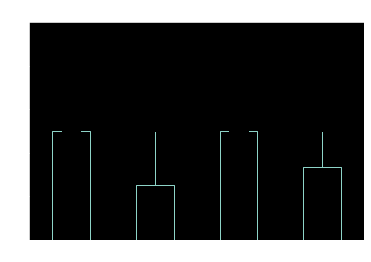

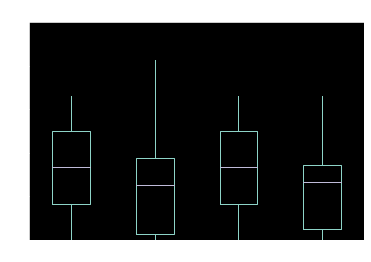

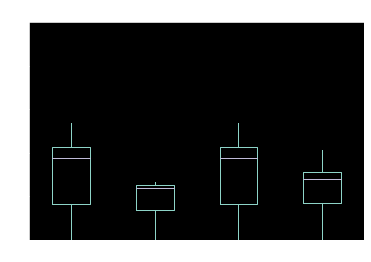

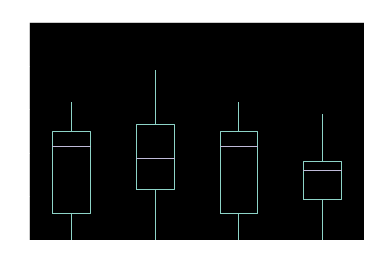

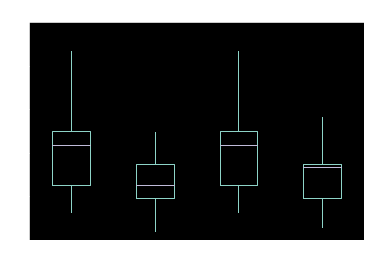

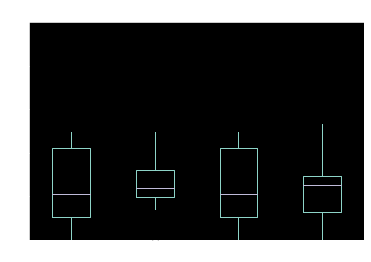

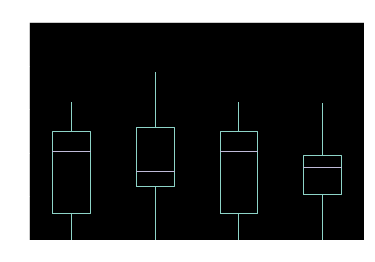

In [11]:
ver_dir = 'culdiff_save/004_add_word_lesslr/'
main_testresult(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

/home/yamashita/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


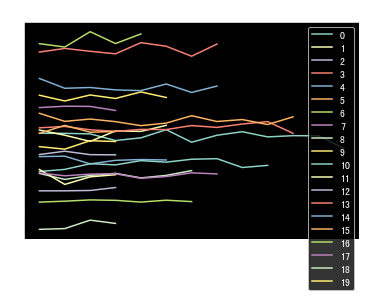

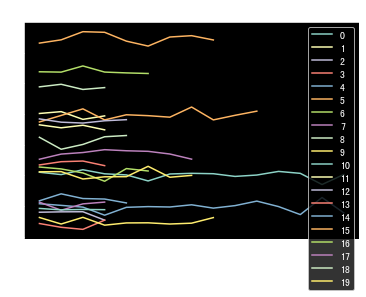

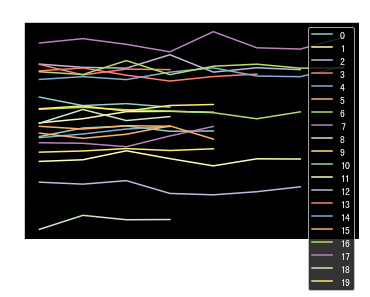

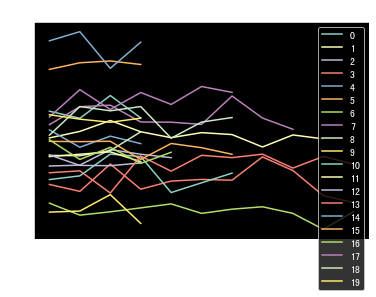

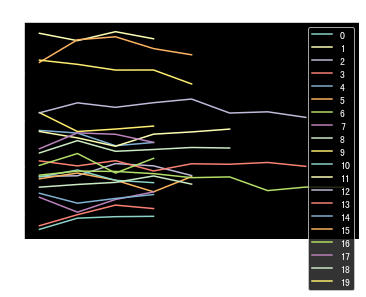

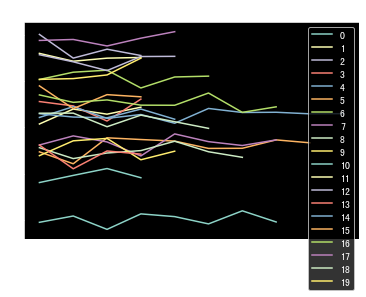

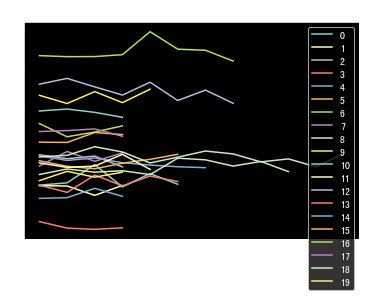

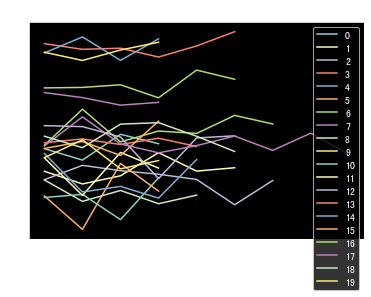

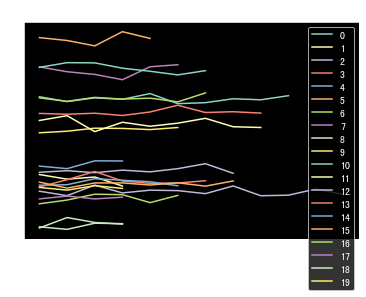

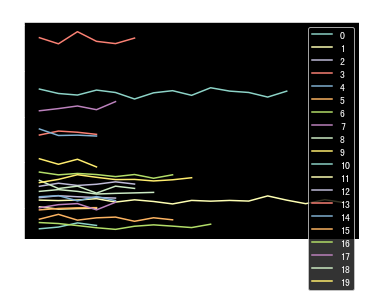

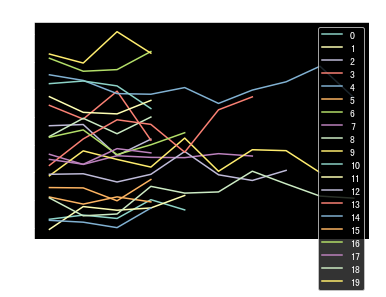

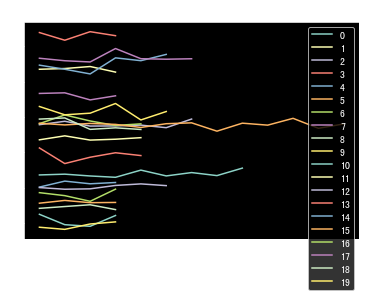

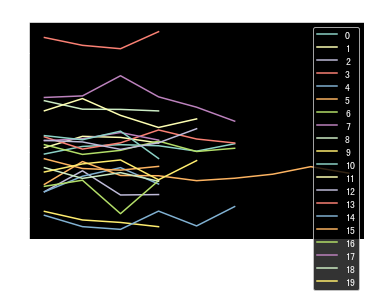

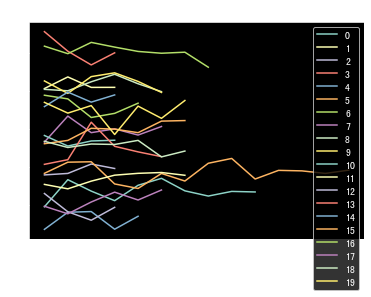

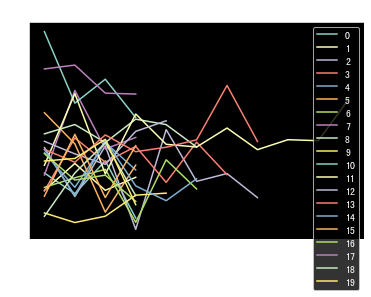

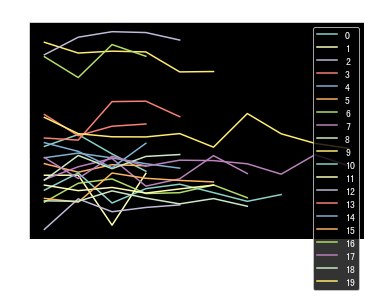

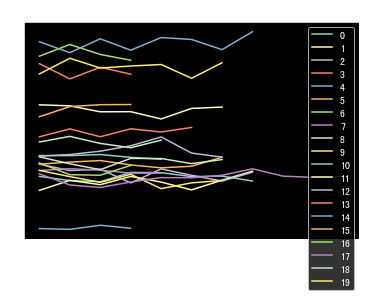

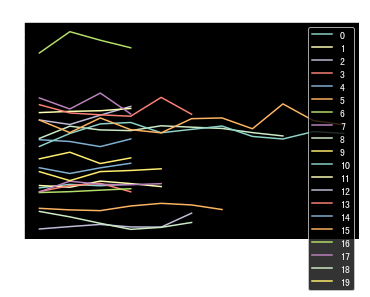

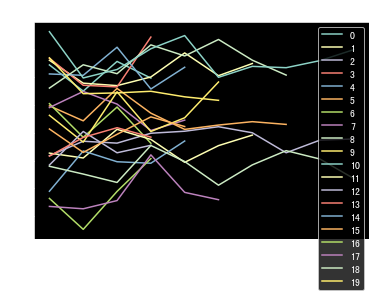

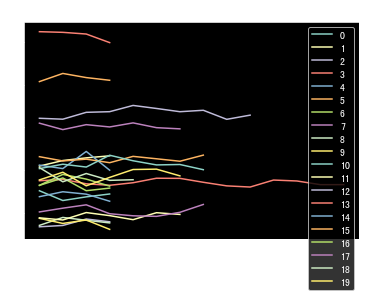

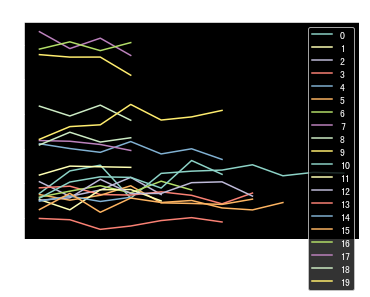

In [12]:
main_trainloss(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

/home/yamashita/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


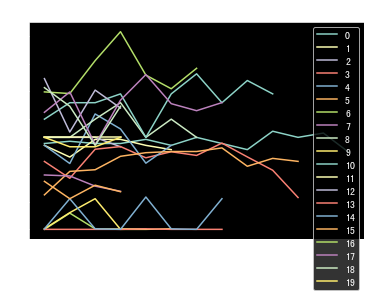

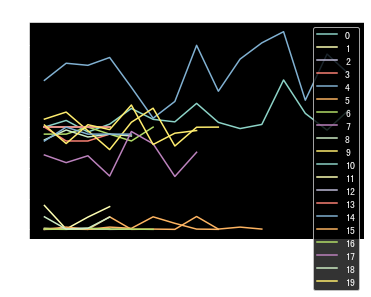

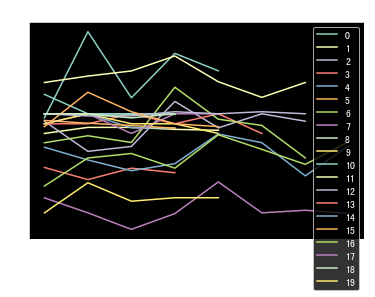

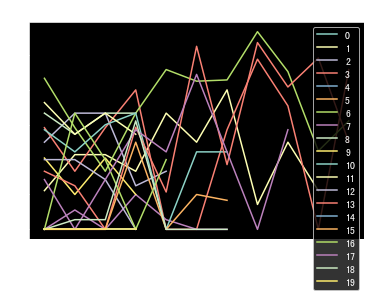

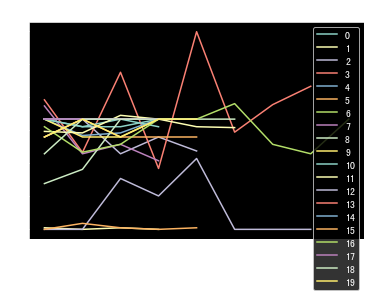

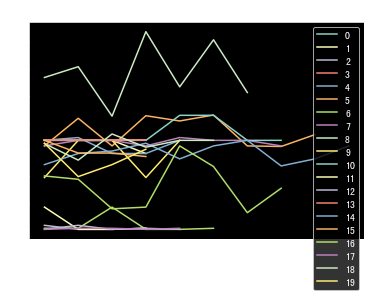

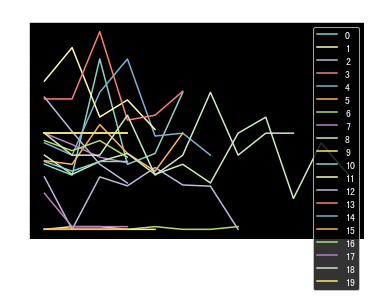

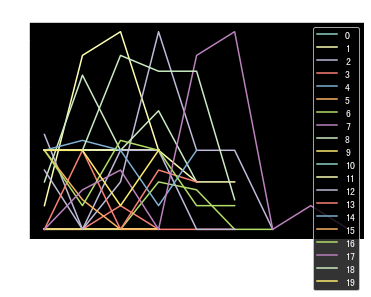

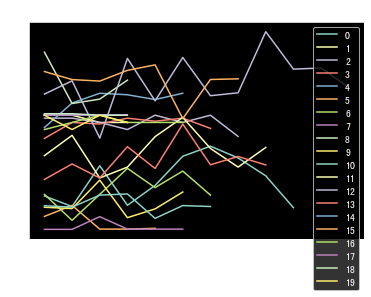

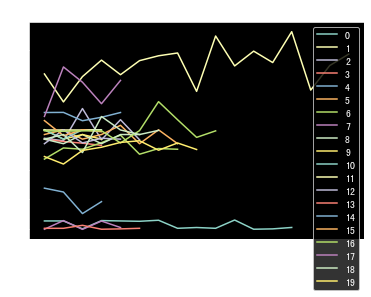

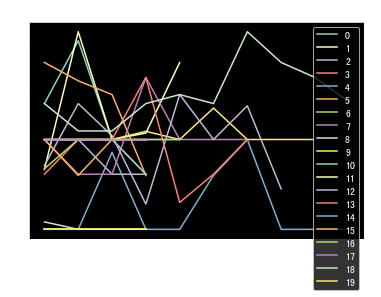

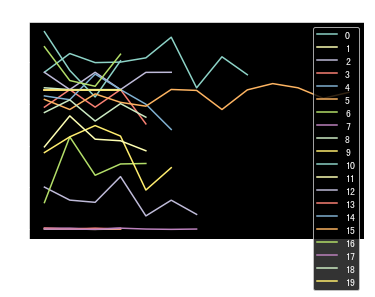

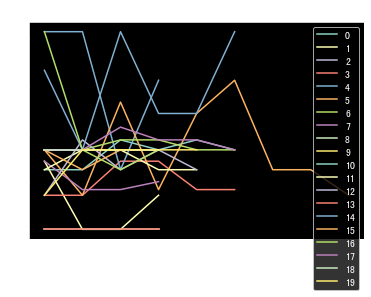

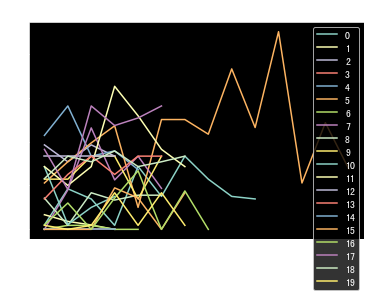

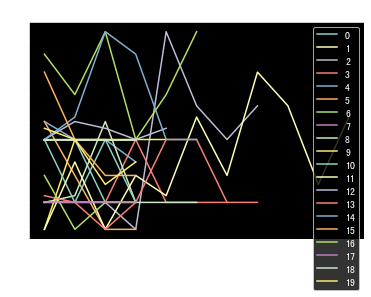

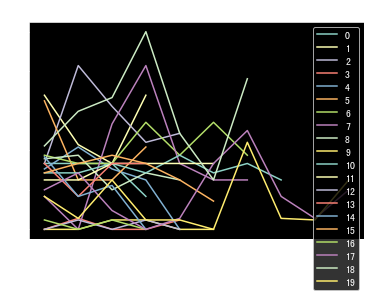

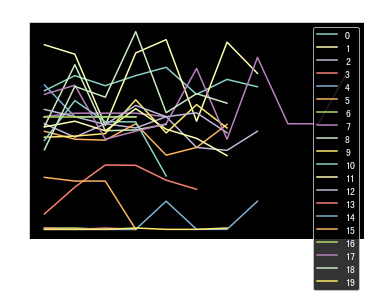

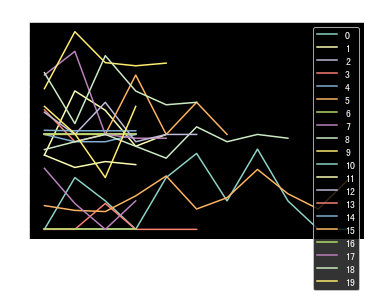

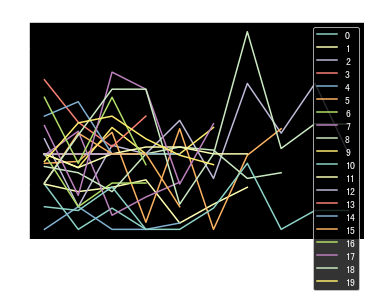

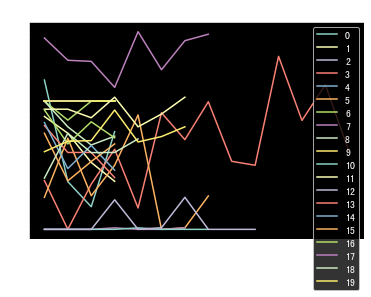

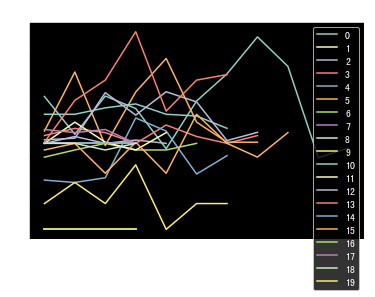

In [13]:
main_valf1(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

In [14]:

# ver_dir, tgt, data_diff_type, label_orientation, intense_orientation = 'culdiff_save/002_add_word/', 'ja', 'del', 'direct', ''
# get_testresult_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)
# get_trainloss_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)
# get_valf1_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)

# 006_add_word_del_word_onlyhtunaligned_lesslr

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja del direct 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.390385   0.285610   0.390385   0.289913
std     0.189771   0.168790   0.189771   0.136392
min     0.000000   0.000000   0.000000   0.000000
25%     0.413462   0.240000   0.413462   0.285931
50%     0.480769   0.250000   0.480769   0.333333
75%     0.500000   0.262308   0.500000   0.342105
max     0.576923   0.770833   0.576923   0.484685

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja del intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.330556   0.247248   0.330556   0.257519
std     0.211914   0.178483   0.211914   0.182191
min     0.000000   0.000000   0.000000   0.000000
25%     0.125000   0.221214   0.125000   0.126742
50%     0.444444   0.250000   0.444444   0.302935
75%     0.472222   0.269699   0.472222   0.333333
max     0.722222   0.701754   0.722222   0.711712

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja del intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.340000   0.339017   0.340000   0.272200
std     0.185624   0.220564   0.185624   0.128283
min     0.000000   0.000000   0.000000   0.000000
25%     0.191667   0.213333   0.191667   0.191667
50%     0.466667   0.245690   0.466667   0.296970
75%     0.475000   0.500000   0.475000   0.384405
max     0.533333   0.758621   0.533333   0.447205

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja del perspective 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.212500   0.161458   0.212500   0.172917
std     0.233326   0.198205   0.233326   0.197404
min     0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000
50%     0.125000   0.031250   0.125000   0.050000
75%     0.500000   0.250000   0.500000   0.333333
max     0.500000   0.583333   0.500000   0.500000

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja add direct 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.339583   0.238305   0.339583   0.249031
std     0.204247   0.186287   0.204247   0.167519
min     0.000000   0.000000   0.000000   0.000000
25%     0.187500   0.170650   0.187500   0.163094
50%     0.416667   0.228547   0.416667   0.278852
75%     0.500000   0.250000   0.500000   0.333333
max     0.625000   0.689474   0.625000   0.590133

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja add intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.316667   0.227765   0.316667   0.234928
std     0.224341   0.194223   0.224341   0.185739
min     0.000000   0.000000   0.000000   0.000000
25%     0.041667   0.001854   0.041667   0.003551
50%     0.395833   0.250000   0.395833   0.323590
75%     0.500000   0.255208   0.500000   0.333333
max     0.666667   0.735043   0.666667   0.693333

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja add intense downgrader


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.225000   0.150000   0.225000   0.170833
std     0.227977   0.149561   0.227977   0.161034
min     0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000
50%     0.250000   0.250000   0.250000   0.250000
75%     0.500000   0.250000   0.500000   0.333333
max     0.500000   0.500000   0.500000   0.333333

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja add intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.285714   0.173058   0.285714   0.204971
std     0.219853   0.165207   0.219853   0.181935
min     0.000000   0.000000   0.000000   0.000000
25%     0.071429   0.005102   0.071429   0.009524
50%     0.357143   0.238400   0.357143   0.280176
75%     0.500000   0.250000   0.500000   0.333333
max     0.642857   0.645833   0.642857   0.641026

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja add perspective 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.137500   0.064583   0.137500   0.084167
std     0.171583   0.092653   0.171583   0.114896
min     0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000
50%     0.000000   0.000000   0.000000   0.000000
75%     0.250000   0.078125   0.250000   0.116667
max     0.500000   0.250000   0.500000   0.333333

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja all direct 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.362000   0.322667   0.362000   0.302796
std     0.173375   0.219380   0.173375   0.159547
min     0.020000   0.000400   0.020000   0.000784
25%     0.275000   0.230400   0.275000   0.258767
50%     0.400000   0.260862   0.400000   0.316964
75%     0.485000   0.447102   0.485000   0.356645
max     0.600000   0.800000   0.600000   0.641326

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja all intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.318548   0.263734   0.318548   0.235953
std     0.208523   0.223625   0.208523   0.163899
min     0.016129   0.000260   0.016129   0.000512
25%     0.072581   0.154598   0.072581   0.063608
50%     0.435484   0.240016   0.435484   0.309683
75%     0.487903   0.304137   0.487903   0.341265
max     0.516129   0.754098   0.516129   0.464875

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja all intense downgrader


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.312500   0.179732   0.312500   0.212737
std     0.200739   0.129727   0.200739   0.136169
min     0.000000   0.000000   0.000000   0.000000
25%     0.125000   0.098214   0.125000   0.132812
50%     0.375000   0.232143   0.375000   0.238636
75%     0.500000   0.250000   0.500000   0.333333
max     0.500000   0.500000   0.500000   0.333333

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja all intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.352273   0.271348   0.352273   0.269261
std     0.179334   0.181832   0.179334   0.133987
min     0.000000   0.000000   0.000000   0.000000
25%     0.227273   0.216895   0.227273   0.198241
50%     0.454545   0.250000   0.454545   0.325568
75%     0.477273   0.282404   0.477273   0.337500
max     0.522727   0.739177   0.522727   0.478302

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ ja all perspective 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.200000   0.153475   0.200000   0.151224
std     0.216126   0.194638   0.216126   0.179043
min     0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000
50%     0.125000   0.062500   0.125000   0.091667
75%     0.375000   0.250000   0.375000   0.221591
max     0.625000   0.633333   0.625000   0.619048

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ zh add direct 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.366667   0.217778   0.366667   0.257540
std     0.199414   0.179049   0.199414   0.169560
min     0.000000   0.000000   0.000000   0.000000
25%     0.291667   0.106944   0.291667   0.154762
50%     0.500000   0.250000   0.500000   0.333333
75%     0.500000   0.250000   0.500000   0.333333
max     0.666667   0.666667   0.666667   0.666667

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ zh add intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.302083   0.345624   0.302083   0.254057
std     0.176712   0.210223   0.176712   0.121265
min     0.000000   0.000000   0.000000   0.000000
25%     0.156250   0.245192   0.156250   0.190201
50%     0.375000   0.277778   0.375000   0.328431
75%     0.458333   0.433036   0.458333   0.336661
max     0.500000   0.750000   0.500000   0.377895

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ zh add intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.288636   0.207355   0.288636   0.221677
std     0.214865   0.148124   0.214865   0.148182
min     0.000000   0.000000   0.000000   0.000000
25%     0.068182   0.136364   0.068182   0.107143
50%     0.363636   0.250000   0.363636   0.283333
75%     0.500000   0.250000   0.500000   0.333333
max     0.545455   0.596491   0.545455   0.476190

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ zh all direct 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.293750   0.259747   0.293750   0.240949
std     0.195656   0.199381   0.195656   0.155772
min     0.000000   0.000000   0.000000   0.000000
25%     0.125000   0.160156   0.125000   0.142857
50%     0.312500   0.250000   0.312500   0.250000
75%     0.500000   0.375000   0.500000   0.333333
max     0.625000   0.785714   0.625000   0.563636

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ zh all intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.353846   0.296825   0.353846   0.295507
std     0.204512   0.211221   0.204512   0.188678
min     0.000000   0.000000   0.000000   0.000000
25%     0.230769   0.188503   0.230769   0.206250
50%     0.423077   0.250000   0.423077   0.333333
75%     0.500000   0.481250   0.500000   0.400624
max     0.692308   0.692308   0.692308   0.692308

culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/ zh all intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.340909   0.272968   0.340909   0.276403
std     0.150756   0.143178   0.150756   0.096852
min     0.000000   0.000000   0.000000   0.000000
25%     0.181818   0.232721   0.181818   0.229102
50%     0.386364   0.250000   0.386364   0.303846
75%     0.454545   0.285256   0.454545   0.333333
max     0.500000   0.763158   0.500000   0.416667

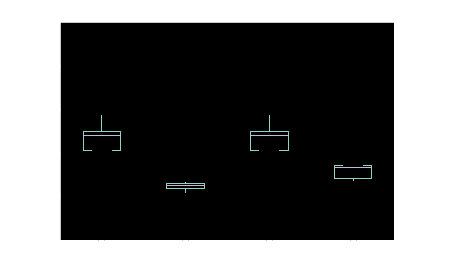

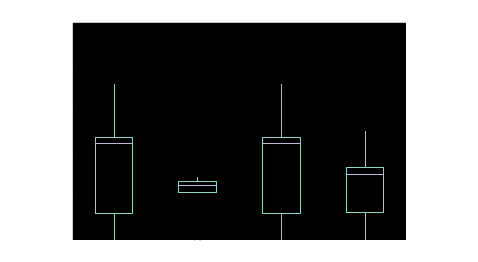

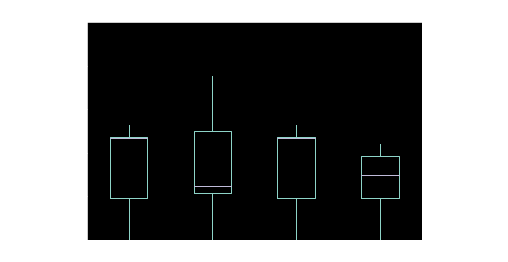

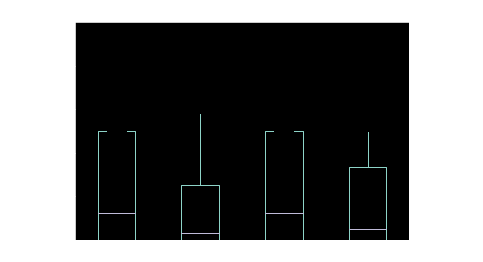

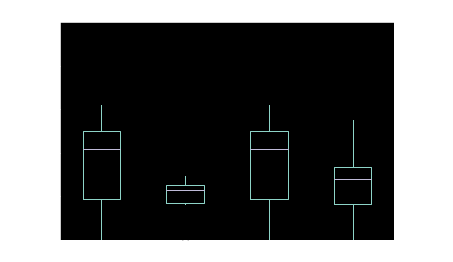

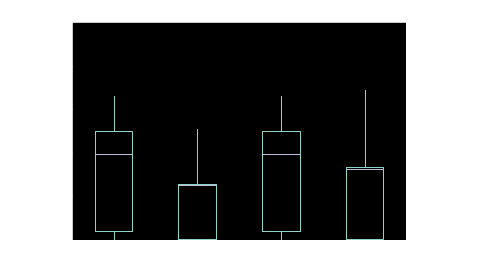

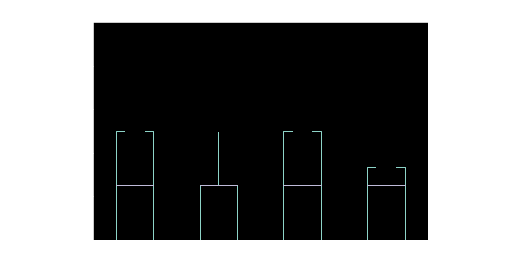

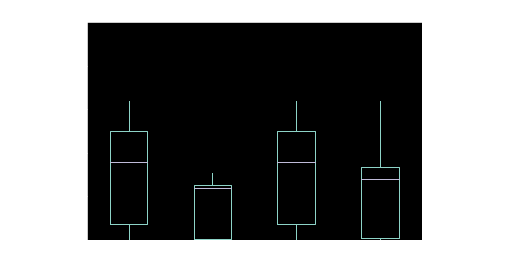

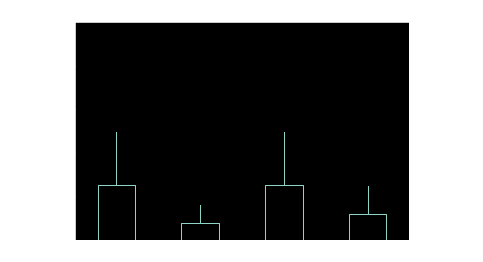

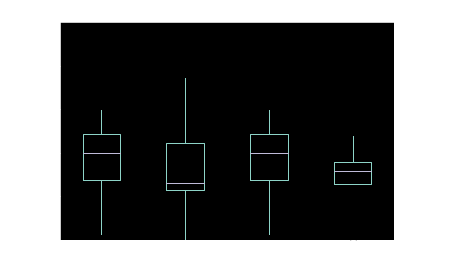

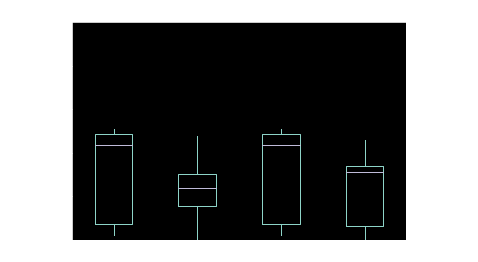

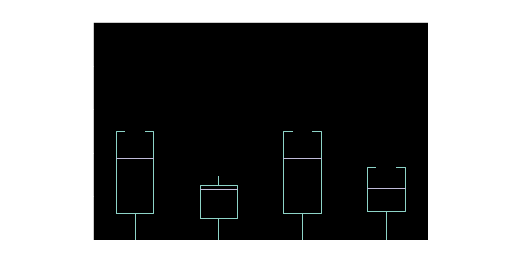

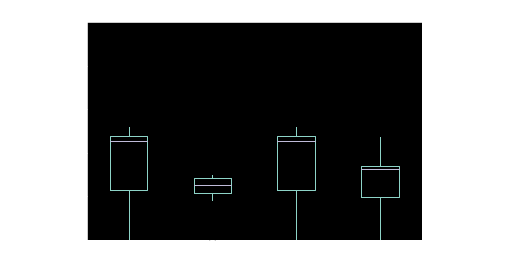

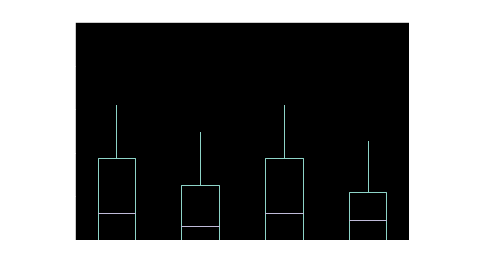

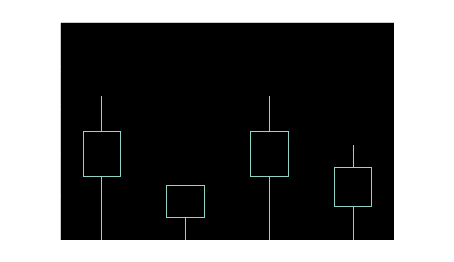

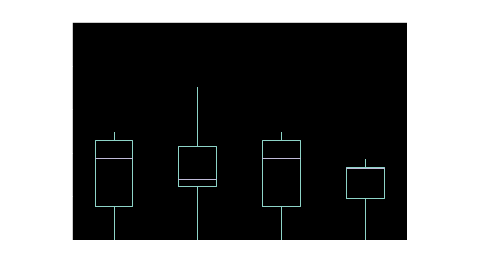

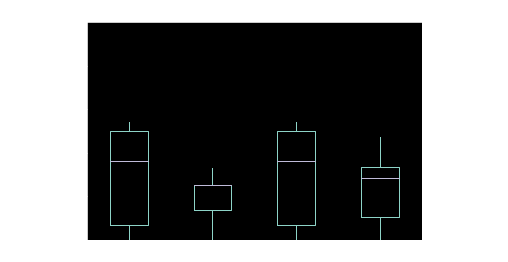

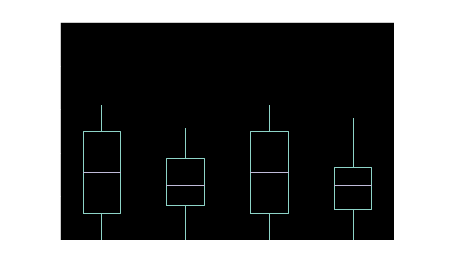

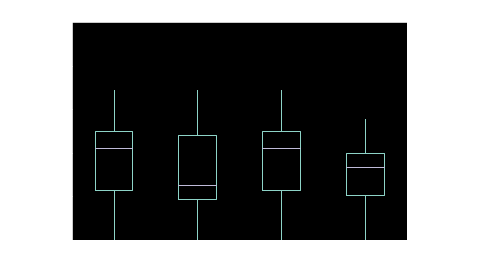

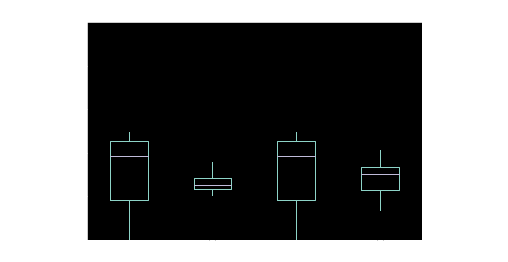

In [33]:
tgt_list = ['ja','zh']
data_diff_type_list = ['del','add','all']
# data_diff_type_list = ['del','add']
#### FOR VER.>=005
label_orientation_list = ["direct","intense","intense","intense","perspective"]
#### FOR VER.>=005
intense_orientation_list =['','all','downgrader','specific','']
ver_dir = 'culdiff_save/006_add_word_del_word_onlyhtunaligned_lesslr/'
main_testresult_005(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

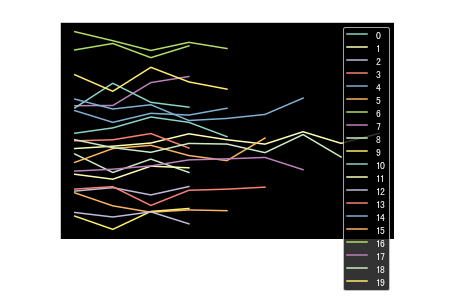

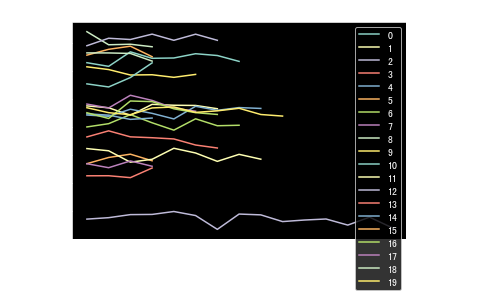

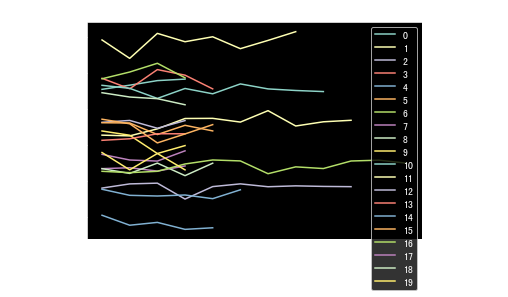

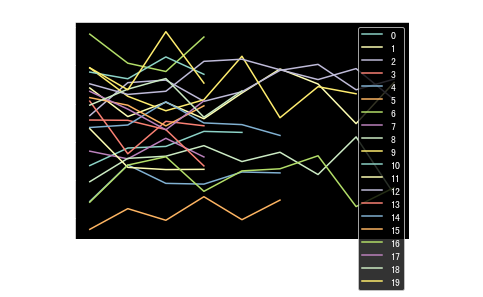

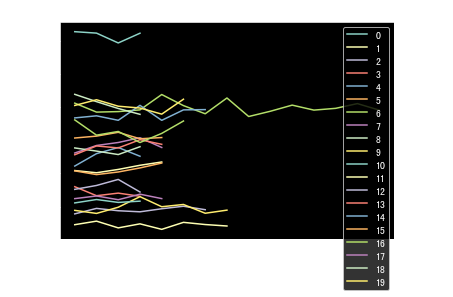

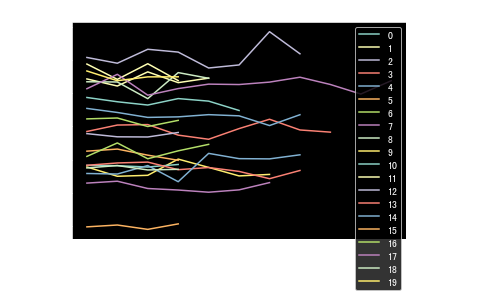

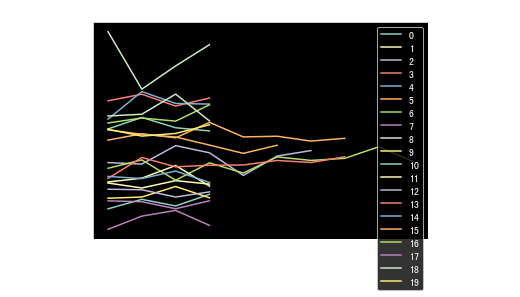

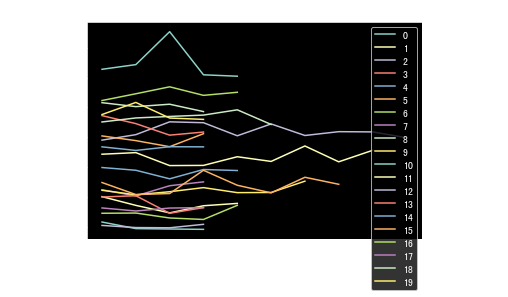

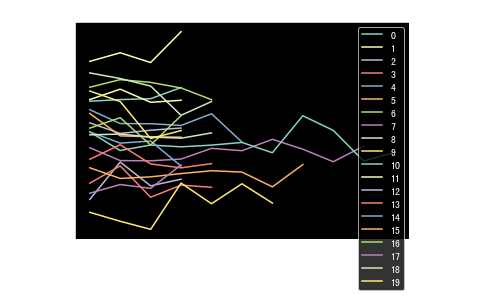

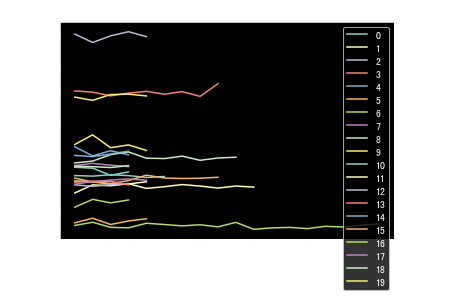

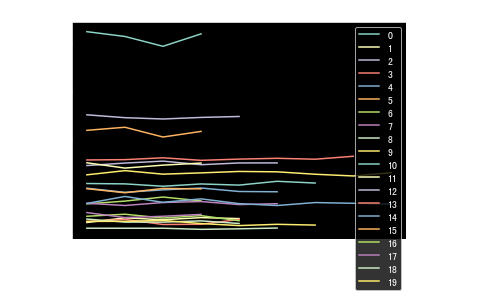

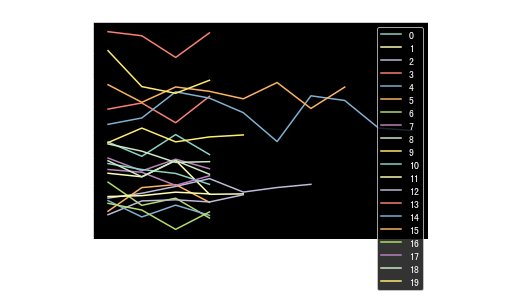

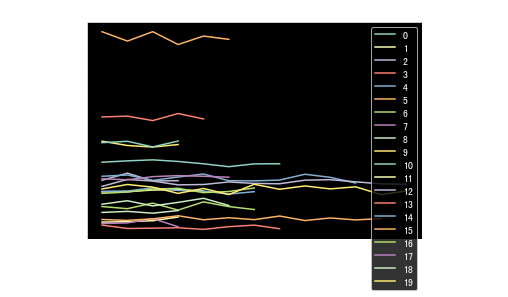

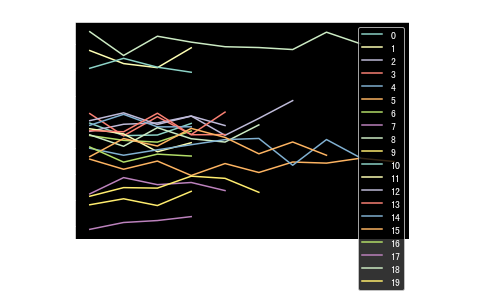

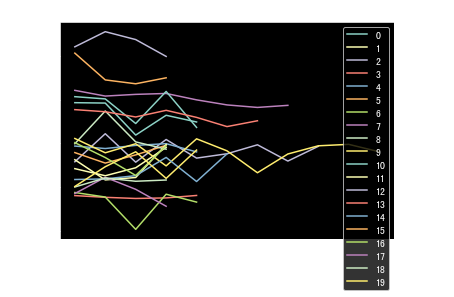

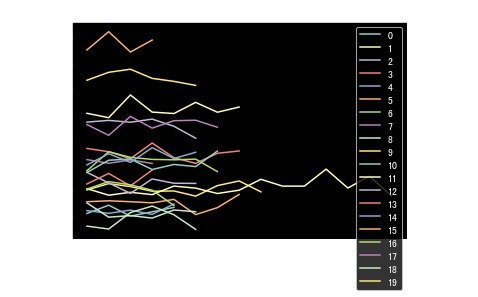

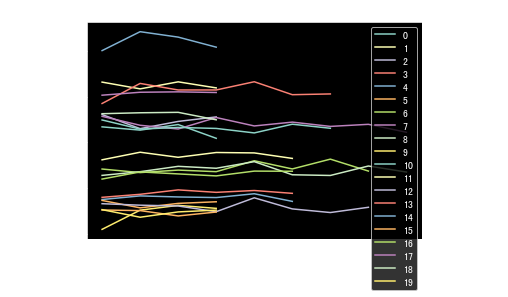

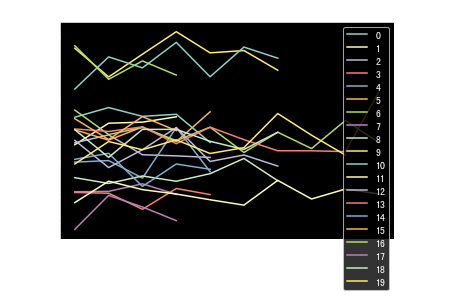

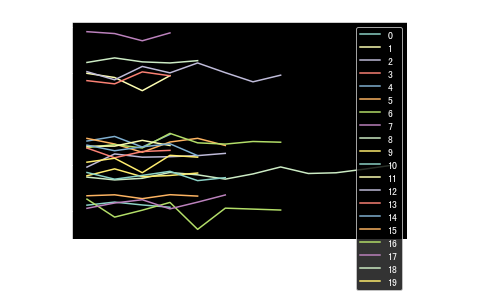

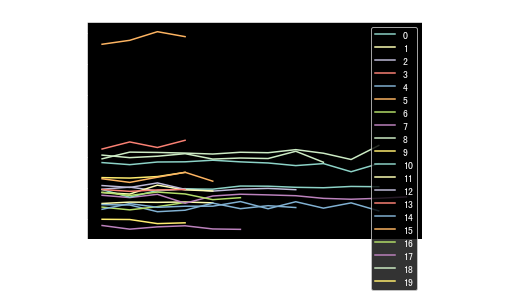

In [16]:
main_trainloss_005(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

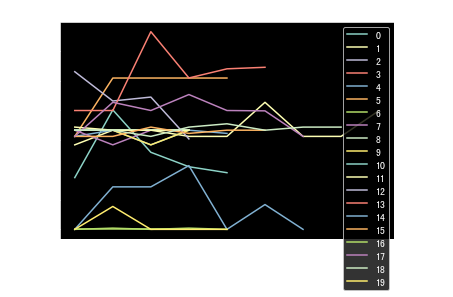

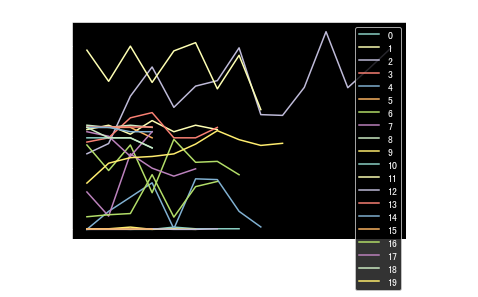

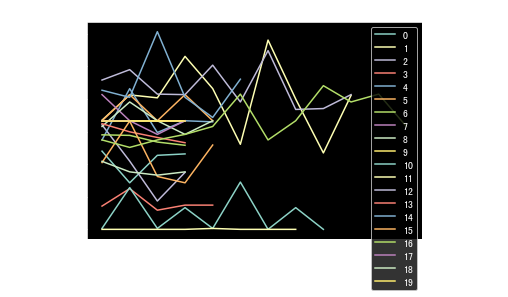

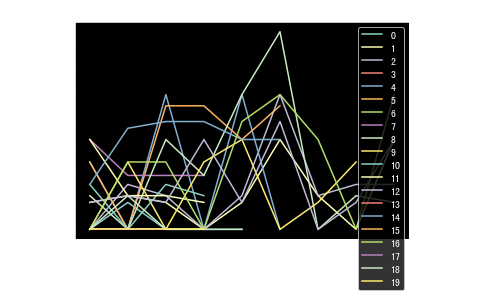

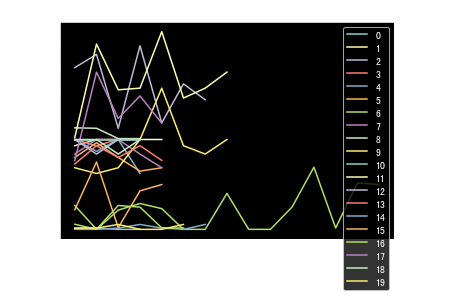

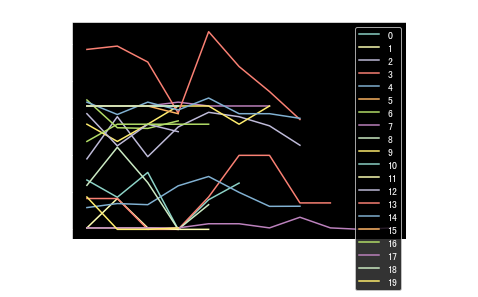

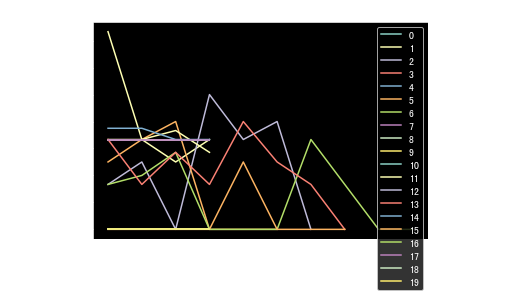

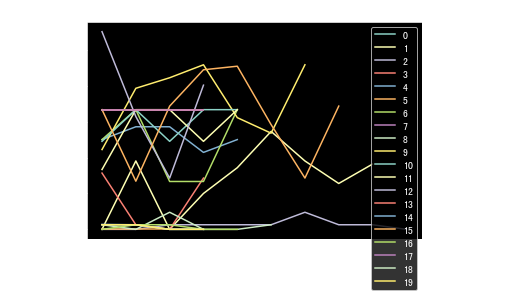

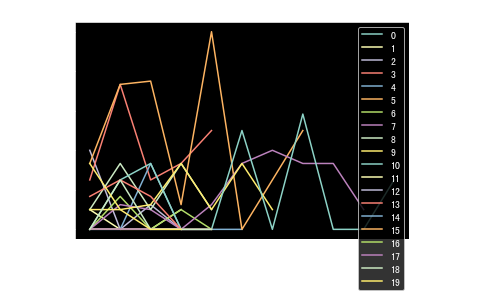

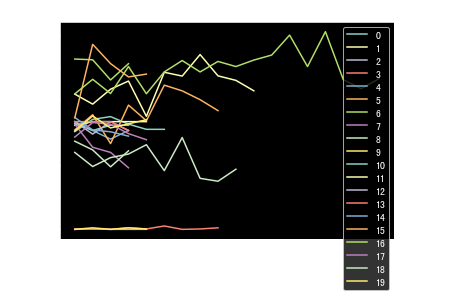

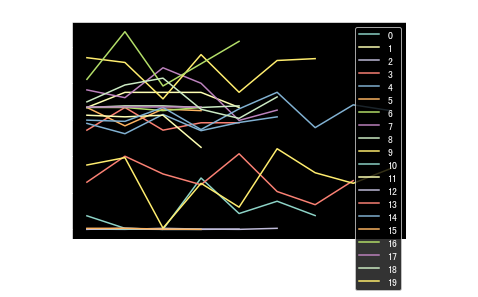

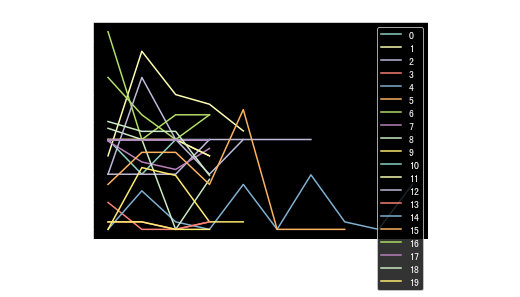

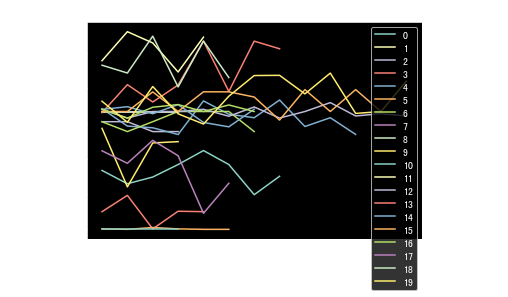

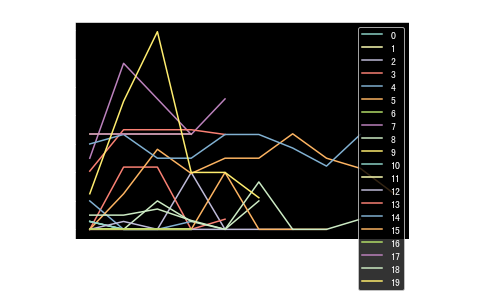

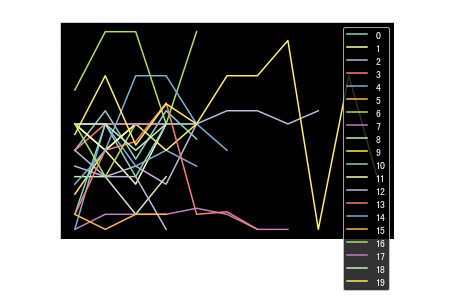

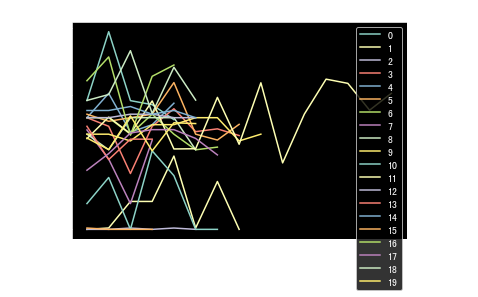

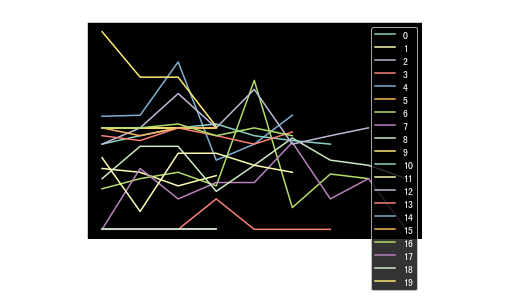

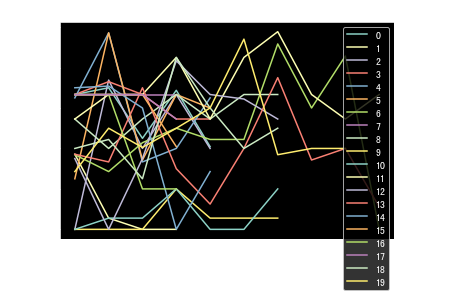

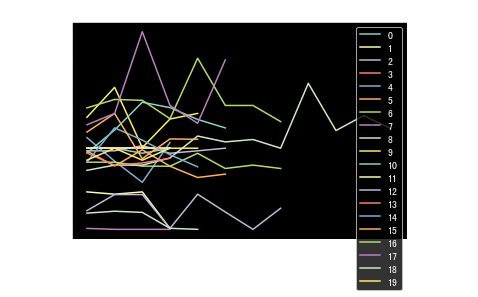

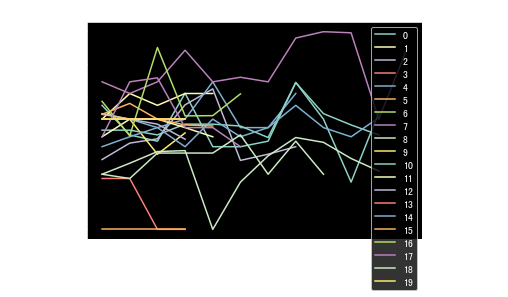

In [17]:
main_valf1_005(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

In [18]:

# ver_dir, tgt, data_diff_type, label_orientation, intense_orientation = 'culdiff_save/002_add_word/', 'ja', 'del', 'direct', ''
# get_testresult_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)
# get_trainloss_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)
# get_valf1_df(ver_dir,tgt,data_diff_type,label_orientation,intense_orientation)

# 008_add_word_del_word_onlyHT_lesslr_ja_req_query

culdiff_save/008_add_word_del_word_onlyHT_lesslr_ja_req_query/ ja del direct 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.312500   0.230001   0.312500   0.236288
std     0.220272   0.223450   0.220272   0.173446
min     0.000000   0.000000   0.000000   0.000000
25%     0.046875   0.002930   0.046875   0.005515
50%     0.406250   0.241667   0.406250   0.291063
75%     0.500000   0.254808   0.500000   0.333333
max     0.625000   0.785714   0.625000   0.563636

culdiff_save/008_add_word_del_word_onlyHT_lesslr_ja_req_query/ ja del intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.315385   0.224046   0.315385   0.230945
std     0.184075   0.107211   0.184075   0.121567
min     0.000000   0.000000   0.000000   0.000000
25%     0.115385   0.178994   0.115385   0.154412
50%     0.423077   0.233636   0.423077   0.268637
75%     0.461538   0.250000   0.461538   0.320175
max     0.500000   0.480769   0.500000   0.393357

culdiff_save/008_add_word_del_word_onlyHT_lesslr_ja_req_query/ ja del intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.370000   0.271099   0.370000   0.281538
std     0.193581   0.208836   0.193581   0.159518
min     0.000000   0.000000   0.000000   0.000000
25%     0.325000   0.202500   0.325000   0.279310
50%     0.450000   0.243421   0.450000   0.303321
75%     0.500000   0.274621   0.500000   0.333333
max     0.650000   0.794118   0.650000   0.601140

culdiff_save/008_add_word_del_word_onlyHT_lesslr_ja_req_query/ ja add direct 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.316667   0.176389   0.316667   0.214881
std     0.235081   0.141144   0.235081   0.158051
min     0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000
50%     0.500000   0.250000   0.500000   0.333333
75%     0.500000   0.250000   0.500000   0.333333
max     0.500000   0.500000   0.500000   0.333333

culdiff_save/008_add_word_del_word_onlyHT_lesslr_ja_req_query/ ja add intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.400000   0.237778   0.400000   0.287897
std     0.212201   0.188168   0.212201   0.194082
min     0.000000   0.000000   0.000000   0.000000
25%     0.291667   0.156944   0.291667   0.199405
50%     0.500000   0.250000   0.500000   0.333333
75%     0.500000   0.250000   0.500000   0.333333
max     0.833333   0.708333   0.833333   0.761905

culdiff_save/008_add_word_del_word_onlyHT_lesslr_ja_req_query/ ja all direct 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.422917   0.336859   0.422917   0.331955
std     0.141315   0.163926   0.141315   0.123037
min     0.041667   0.125000   0.041667   0.062500
25%     0.395833   0.231818   0.395833   0.286584
50%     0.458333   0.250947   0.458333   0.333333
75%     0.500000   0.447368   0.500000   0.401030
max     0.583333   0.719203   0.583333   0.583333

culdiff_save/008_add_word_del_word_onlyHT_lesslr_ja_req_query/ ja all intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.298438   0.211863   0.298438   0.221922
std     0.180652   0.146323   0.180652   0.138050
min     0.000000   0.000000   0.000000   0.000000
25%     0.109375   0.138577   0.109375   0.132273
50%     0.390625   0.237634   0.390625   0.286458
75%     0.445312   0.282366   0.445312   0.320612
max     0.500000   0.504464   0.500000   0.392494

culdiff_save/008_add_word_del_word_onlyHT_lesslr_ja_req_query/ ja all intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.281818   0.246139   0.281818   0.218464
std     0.206253   0.165675   0.206253   0.155808
min     0.000000   0.000000   0.000000   0.000000
25%     0.045455   0.182213   0.045455   0.076923
50%     0.318182   0.250000   0.318182   0.253384
75%     0.465909   0.284226   0.465909   0.333333
max     0.545455   0.547009   0.545455   0.541667

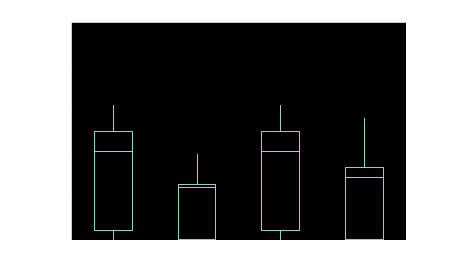

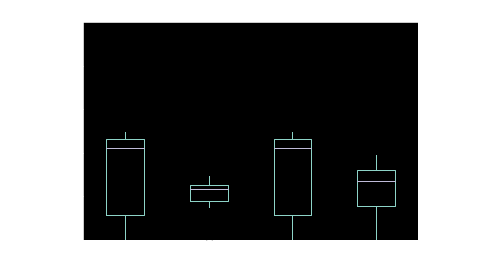

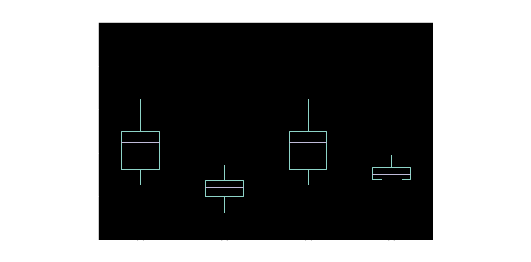

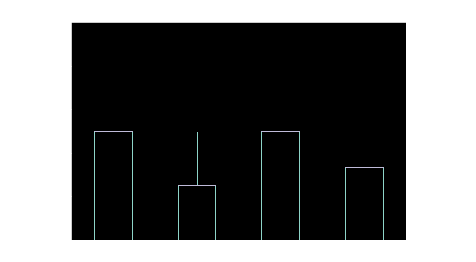

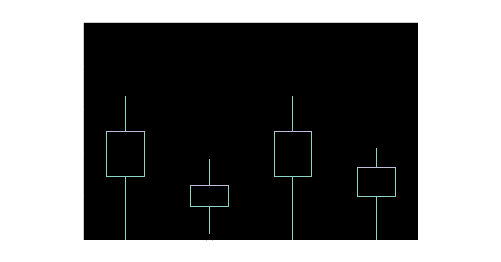

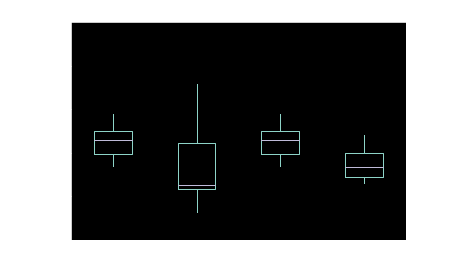

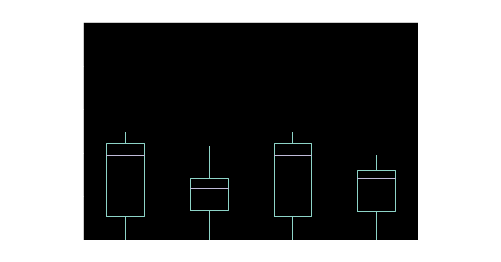

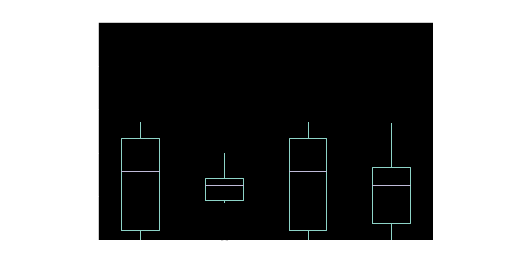

In [13]:
tgt_list = ['ja']
data_diff_type_list = ['del','add','all']
label_orientation_list = ["direct","intense","intense"]
intense_orientation_list =['','all','specific']

ver_dir = 'culdiff_save/008_add_word_del_word_onlyHT_lesslr_ja_req_query/'
main_testresult_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

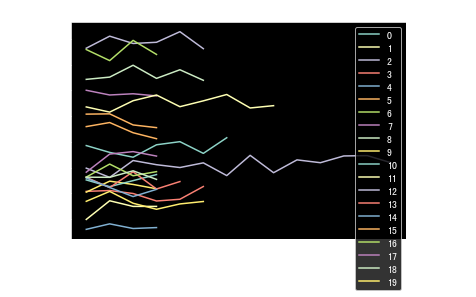

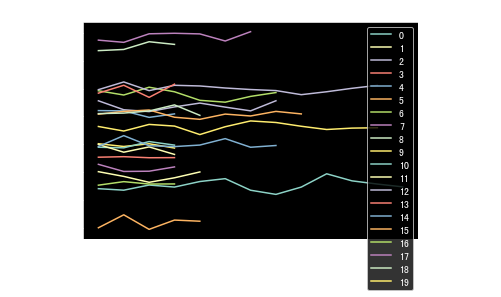

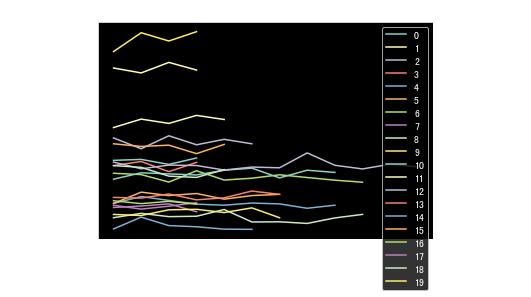

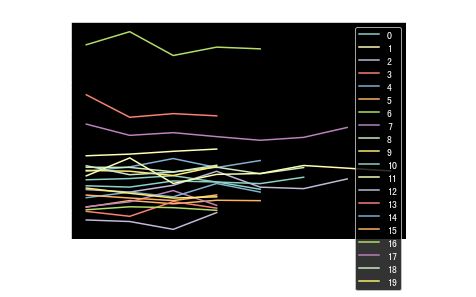

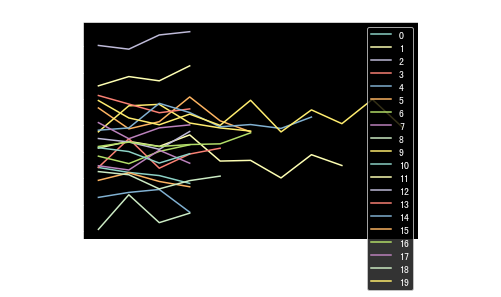

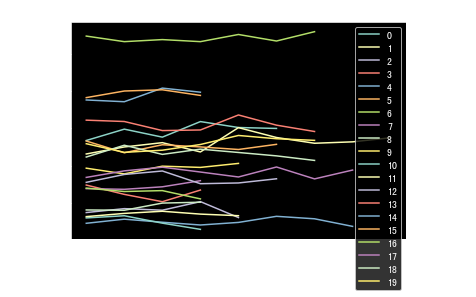

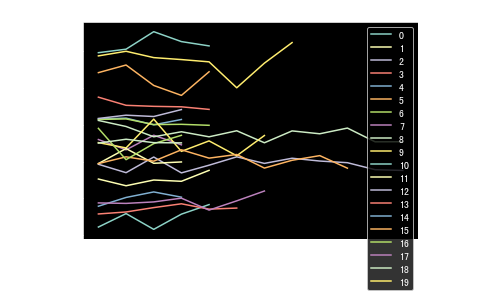

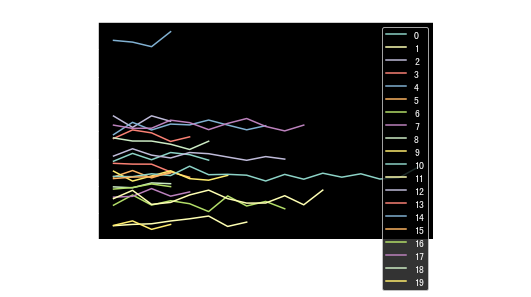

In [20]:
main_trainloss_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

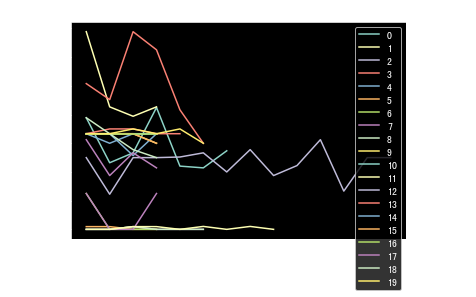

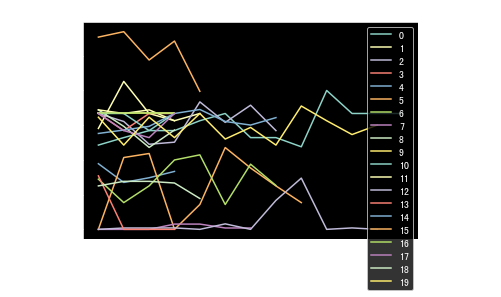

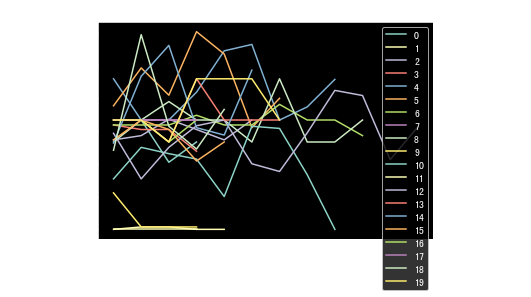

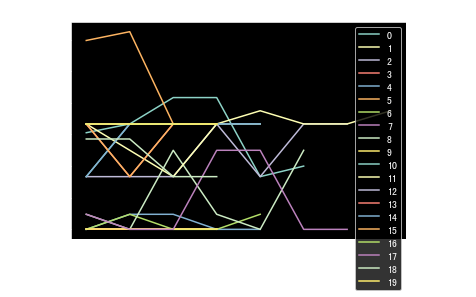

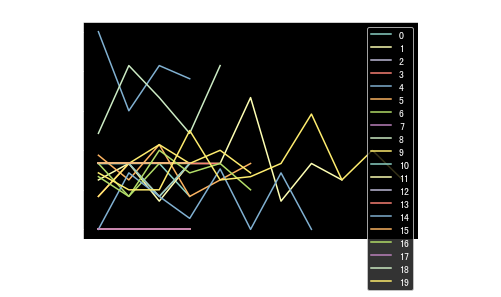

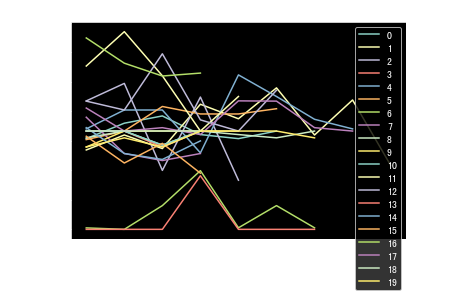

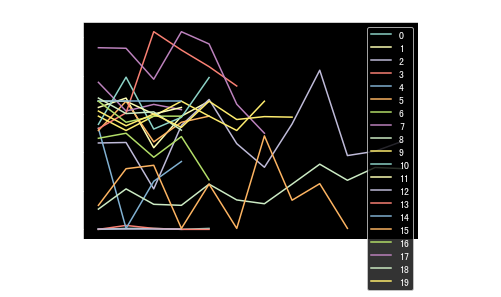

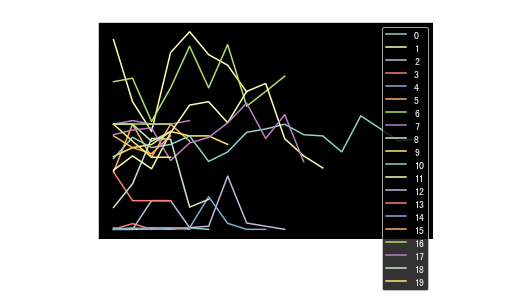

In [21]:
main_valf1_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

# 010_add_word_del_word_onlyHT_lesslr_ja_tha_res

culdiff_save/010_add_word_del_word_onlyHT_lesslr_ja_tha_res/ ja del direct 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.368750   0.235417   0.368750   0.271315
std     0.204694   0.171394   0.204694   0.148440
min     0.000000   0.000000   0.000000   0.000000
25%     0.218750   0.202381   0.218750   0.240260
50%     0.500000   0.250000   0.500000   0.333333
75%     0.500000   0.250000   0.500000   0.333333
max     0.625000   0.833333   0.625000   0.600000

culdiff_save/010_add_word_del_word_onlyHT_lesslr_ja_tha_res/ ja del intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.315000   0.292688   0.315000   0.257619
std     0.232322   0.239947   0.232322   0.181017
min     0.000000   0.000000   0.000000   0.000000
25%     0.075000   0.150000   0.075000   0.125000
50%     0.400000   0.263889   0.400000   0.309524
75%     0.500000   0.500000   0.500000   0.364011
max     0.600000   0.777778   0.600000   0.523810

culdiff_save/010_add_word_del_word_onlyHT_lesslr_ja_tha_res/ ja del intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.315000   0.294375   0.315000   0.264212
std     0.245539   0.261709   0.245539   0.207520
min     0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000
50%     0.450000   0.250000   0.450000   0.321429
75%     0.500000   0.500000   0.500000   0.362637
max     0.600000   0.777778   0.600000   0.600000

culdiff_save/010_add_word_del_word_onlyHT_lesslr_ja_tha_res/ ja all direct 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.325000   0.215833   0.325000   0.248095
std     0.260945   0.214427   0.260945   0.217436
min     0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000
50%     0.500000   0.250000   0.500000   0.333333
75%     0.500000   0.250000   0.500000   0.333333
max     0.875000   0.900000   0.875000   0.873016

culdiff_save/010_add_word_del_word_onlyHT_lesslr_ja_tha_res/ ja all intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.305000   0.285804   0.305000   0.263555
std     0.239462   0.266052   0.239462   0.209661
min     0.000000   0.000000   0.000000   0.000000
25%     0.075000   0.093750   0.075000   0.083333
50%     0.300000   0.250000   0.300000   0.250000
75%     0.500000   0.345238   0.500000   0.377404
max     0.700000   0.812500   0.700000   0.670330

culdiff_save/010_add_word_del_word_onlyHT_lesslr_ja_tha_res/ ja all intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.370000   0.266855   0.370000   0.286315
std     0.175019   0.139051   0.175019   0.118704
min     0.000000   0.000000   0.000000   0.000000
25%     0.275000   0.250000   0.275000   0.271212
50%     0.450000   0.250000   0.450000   0.333333
75%     0.500000   0.279762   0.500000   0.333333
max     0.500000   0.600000   0.500000   0.506494

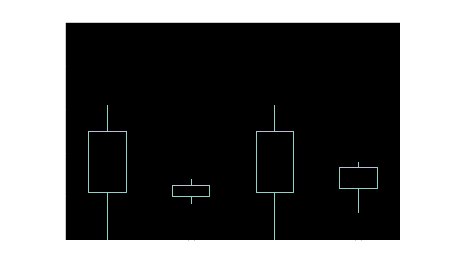

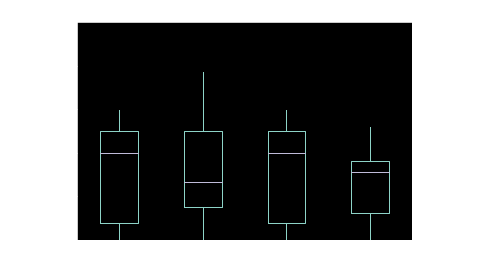

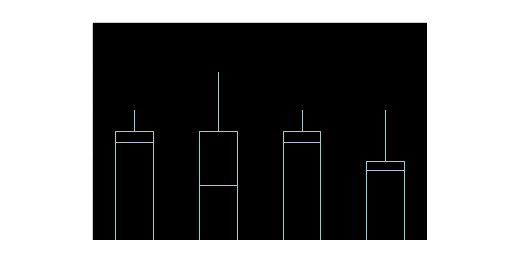

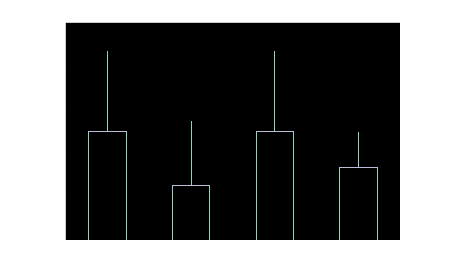

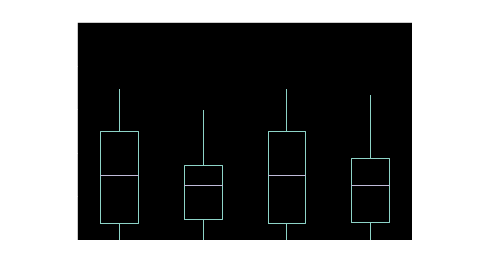

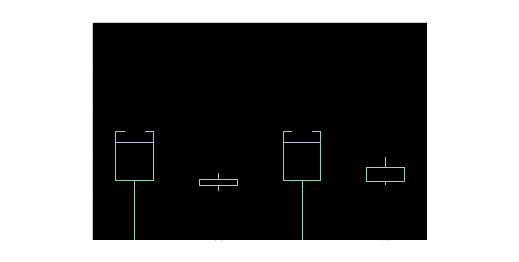

In [12]:
tgt_list = ['ja']
#### FOR VER.<=009
# data_diff_type_list = ['del','add','all']
#### FOR VER.>=009
data_diff_type_list = ['del','all']

label_orientation_list = ["direct","intense","intense"]
intense_orientation_list =['','all','specific']

ver_dir = 'culdiff_save/010_add_word_del_word_onlyHT_lesslr_ja_tha_res/'
main_testresult_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

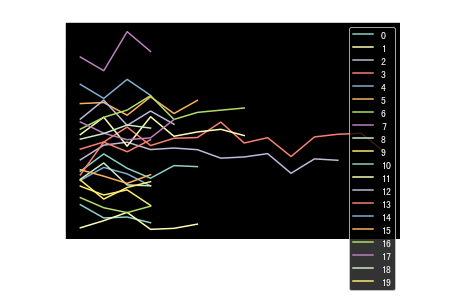

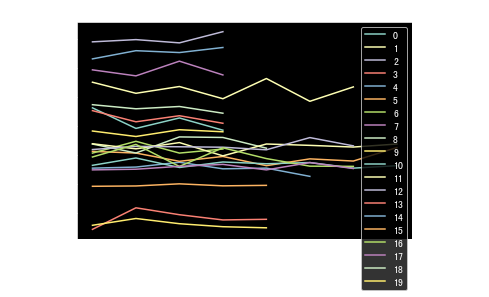

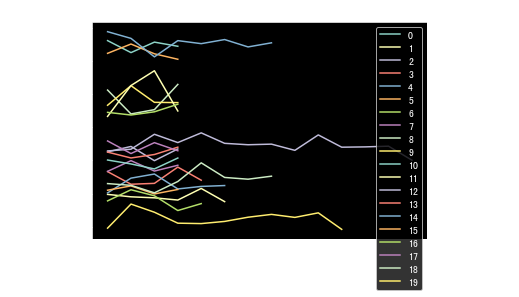

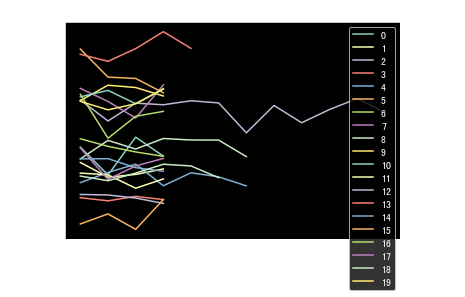

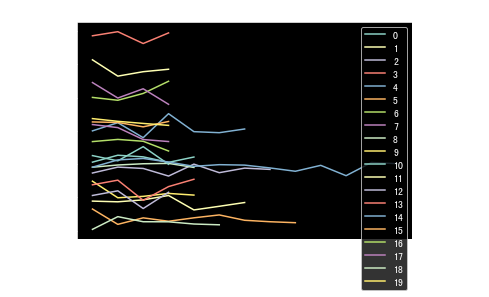

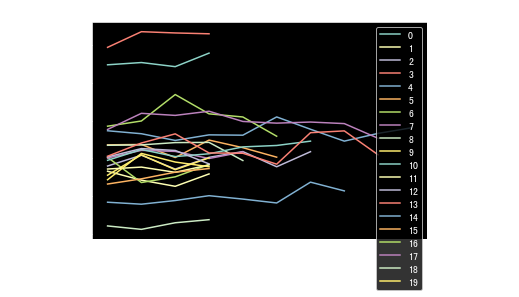

In [23]:
main_trainloss_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

In [ ]:
main_valf1_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

# 110_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr

culdiff_save/110_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/ ja del direct 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.387500   0.302083   0.387500   0.307354
std     0.225438   0.259996   0.225438   0.196422
min     0.000000   0.000000   0.000000   0.000000
25%     0.250000   0.241071   0.250000   0.267045
50%     0.500000   0.250000   0.500000   0.333333
75%     0.500000   0.270833   0.500000   0.333333
max     0.750000   0.875000   0.750000   0.733333

culdiff_save/110_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/ ja del intense all


accuracy  precision    recall         f1
count  20.00000  20.000000  20.00000  20.000000
mean    0.30500   0.269742   0.30500   0.252721
std     0.20641   0.272672   0.20641   0.172586
min     0.00000   0.000000   0.00000   0.000000
25%     0.07500   0.062500   0.07500   0.068182
50%     0.40000   0.250000   0.40000   0.320513
75%     0.50000   0.250000   0.50000   0.333333
max     0.50000   1.000000   0.50000   0.500000

culdiff_save/110_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/ ja del intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.270000   0.264861   0.270000   0.235794
std     0.210513   0.206014   0.210513   0.165563
min     0.000000   0.000000   0.000000   0.000000
25%     0.075000   0.125000   0.075000   0.093750
50%     0.300000   0.250000   0.300000   0.285714
75%     0.500000   0.425000   0.500000   0.333333
max     0.600000   0.625000   0.600000   0.583333

culdiff_save/110_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/ ja all direct 


accuracy  precision    recall         f1
count  20.00000  20.000000  20.00000  20.000000
mean    0.33125   0.240000   0.33125   0.259708
std     0.21565   0.192845   0.21565   0.170373
min     0.00000   0.000000   0.00000   0.000000
25%     0.21875   0.166667   0.21875   0.191667
50%     0.37500   0.250000   0.37500   0.279221
75%     0.50000   0.250000   0.50000   0.333333
max     0.62500   0.785714   0.62500   0.619048

culdiff_save/110_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/ ja all intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.250000   0.180208   0.250000   0.186989
std     0.248151   0.205715   0.248151   0.178164
min     0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000
50%     0.150000   0.208333   0.150000   0.205357
75%     0.500000   0.250000   0.500000   0.333333
max     0.600000   0.812500   0.600000   0.551282

culdiff_save/110_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/ ja all intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.275000   0.229861   0.275000   0.220824
std     0.231414   0.196185   0.231414   0.168308
min     0.000000   0.000000   0.000000   0.000000
25%     0.075000   0.093750   0.075000   0.083333
50%     0.250000   0.250000   0.250000   0.247475
75%     0.500000   0.250000   0.500000   0.333333
max     0.600000   0.777778   0.600000   0.523810

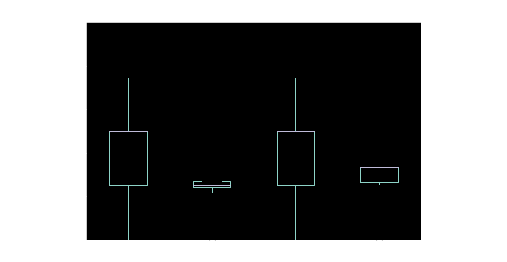

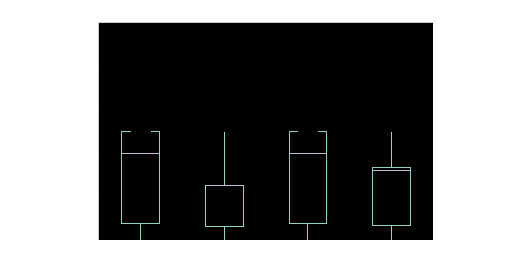

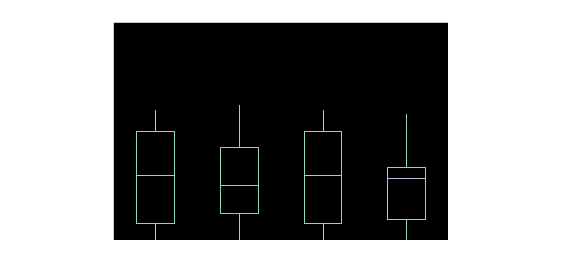

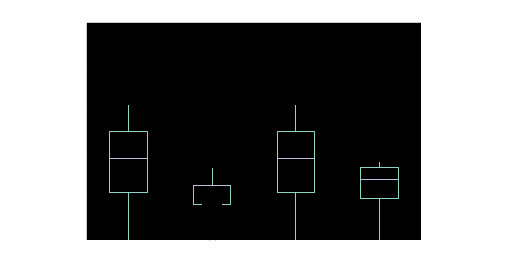

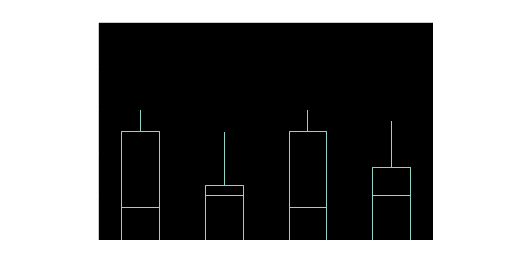

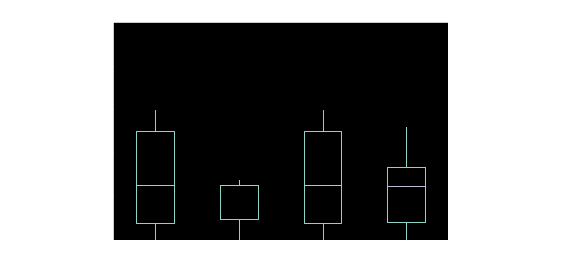

In [34]:
tgt_list = ['ja']
#### FOR VER.<=009
# data_diff_type_list = ['del','add','all']
#### FOR VER.>=009
data_diff_type_list = ['del','all']

label_orientation_list = ["direct","intense","intense"]
intense_orientation_list =['','all','specific']

ver_dir = 'culdiff_save/110_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/'
main_testresult_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

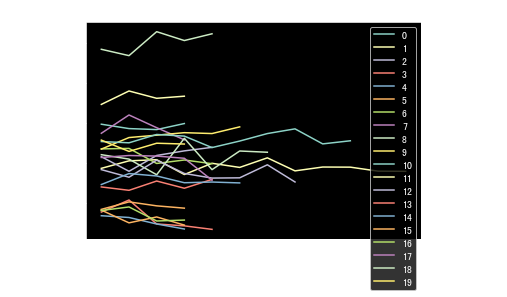

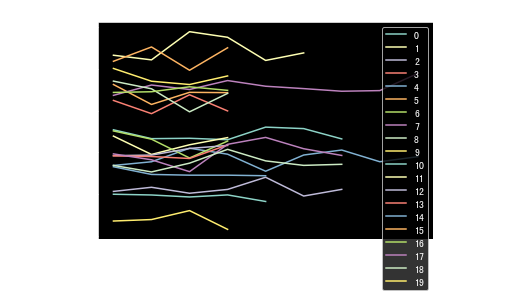

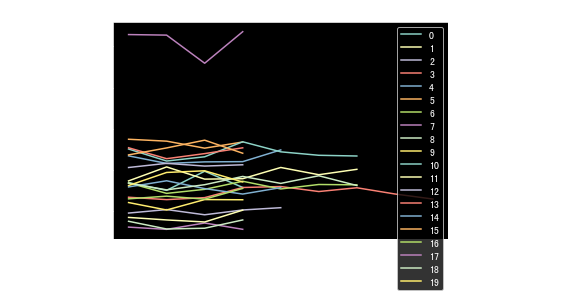

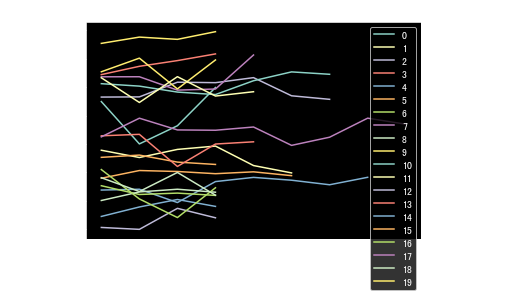

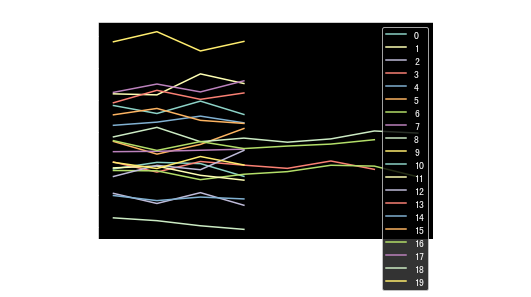

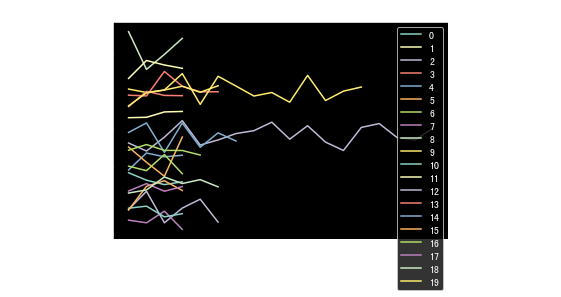

In [35]:
main_trainloss_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

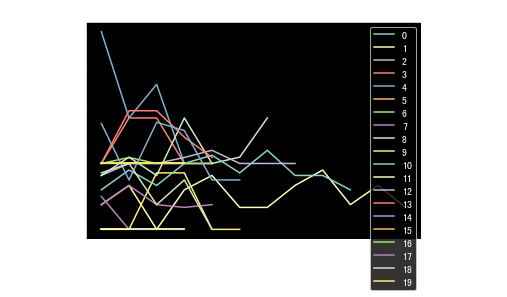

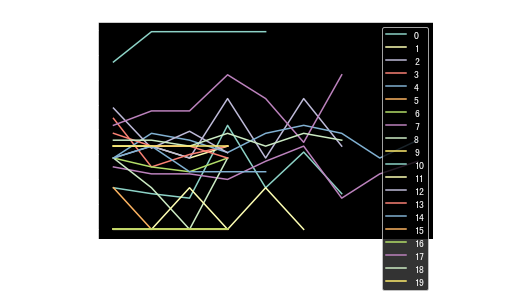

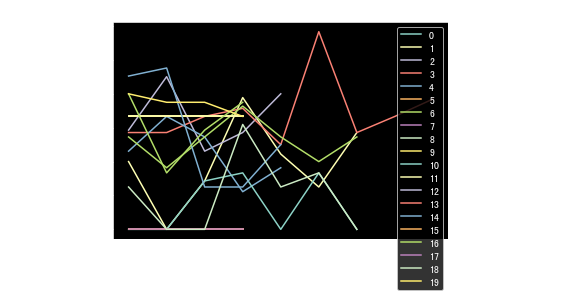

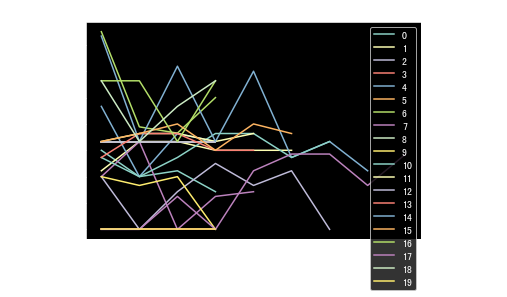

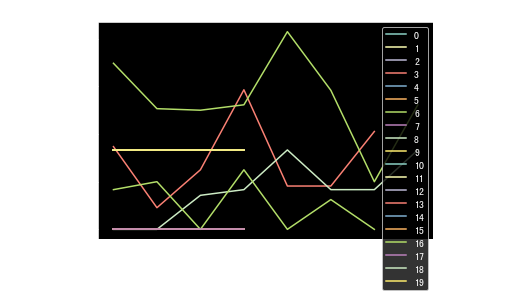

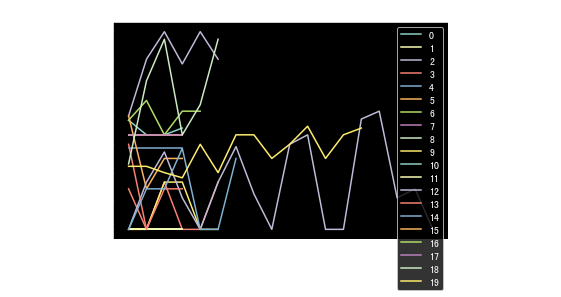

In [36]:
main_valf1_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

# 210_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr

culdiff_save/210_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/ ja del direct 


accuracy  precision    recall         f1
count  20.00000  20.000000  20.00000  20.000000
mean    0.28125   0.277500   0.28125   0.248492
std     0.23950   0.298450   0.23950   0.215579
min     0.00000   0.000000   0.00000   0.000000
25%     0.00000   0.000000   0.00000   0.000000
50%     0.25000   0.225000   0.25000   0.253968
75%     0.50000   0.308333   0.50000   0.333333
max     0.75000   1.000000   0.75000   0.733333

culdiff_save/210_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/ ja del intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.415000   0.291171   0.415000   0.320608
std     0.232322   0.244805   0.232322   0.211566
min     0.000000   0.000000   0.000000   0.000000
25%     0.400000   0.222222   0.400000   0.285714
50%     0.500000   0.250000   0.500000   0.333333
75%     0.500000   0.258929   0.500000   0.333333
max     0.800000   0.857143   0.800000   0.791667

culdiff_save/210_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/ ja del intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.325000   0.290198   0.325000   0.262672
std     0.229129   0.233712   0.229129   0.176327
min     0.000000   0.000000   0.000000   0.000000
25%     0.100000   0.132143   0.100000   0.150000
50%     0.450000   0.250000   0.450000   0.333333
75%     0.500000   0.462500   0.500000   0.357143
max     0.600000   0.777778   0.600000   0.523810

culdiff_save/210_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/ ja all direct 


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.331250   0.276369   0.331250   0.285702
std     0.237431   0.225001   0.237431   0.208691
min     0.000000   0.000000   0.000000   0.000000
25%     0.093750   0.125000   0.093750   0.107143
50%     0.375000   0.250000   0.375000   0.333333
75%     0.500000   0.368750   0.500000   0.365079
max     0.750000   0.833333   0.750000   0.733333

culdiff_save/210_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/ ja all intense all


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.235000   0.262659   0.235000   0.200563
std     0.220705   0.203549   0.220705   0.158145
min     0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000
50%     0.100000   0.250000   0.100000   0.166667
75%     0.500000   0.500000   0.500000   0.333333
max     0.500000   0.500000   0.500000   0.450549

culdiff_save/210_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/ ja all intense specific


accuracy  precision     recall         f1
count  20.000000  20.000000  20.000000  20.000000
mean    0.355000   0.309931   0.355000   0.288552
std     0.182021   0.149384   0.182021   0.120120
min     0.000000   0.000000   0.000000   0.000000
25%     0.175000   0.243056   0.175000   0.214744
50%     0.450000   0.250000   0.450000   0.333333
75%     0.500000   0.425000   0.500000   0.333333
max     0.500000   0.625000   0.500000   0.555556

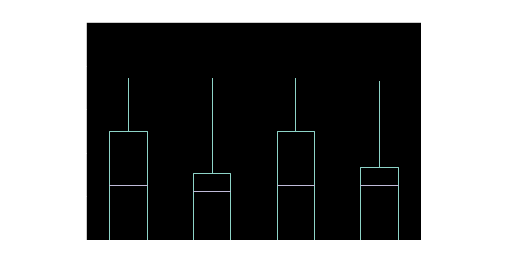

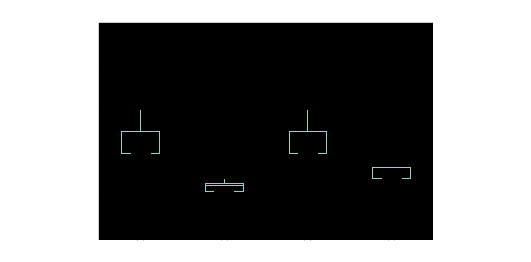

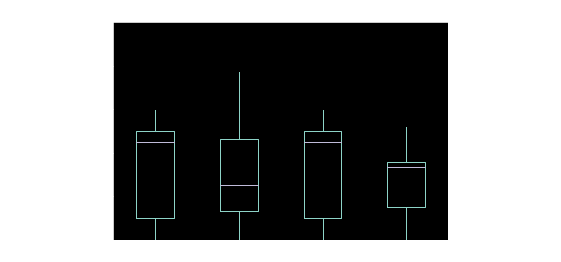

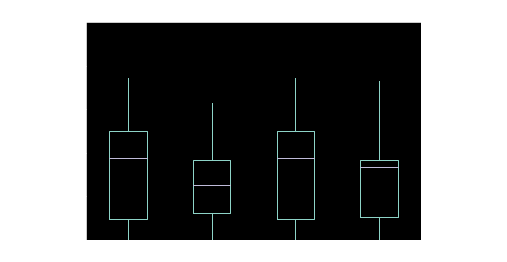

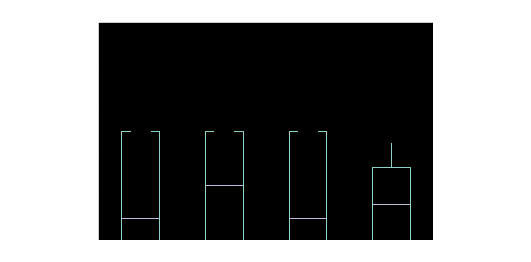

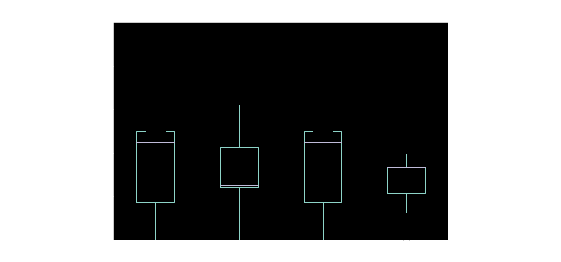

In [40]:
tgt_list = ['ja']
#### FOR VER.<=009
# data_diff_type_list = ['del','add','all']
#### FOR VER.>=009
data_diff_type_list = ['del','all']

label_orientation_list = ["direct","intense","intense"]
intense_orientation_list =['','all','specific']

ver_dir = 'culdiff_save/210_add_word_del_word_onlyHT_lesslr_ja_tha_res_lesslr/'
main_testresult_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

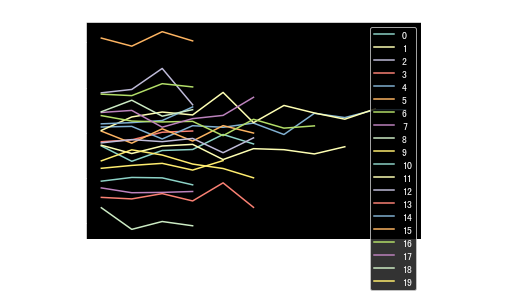

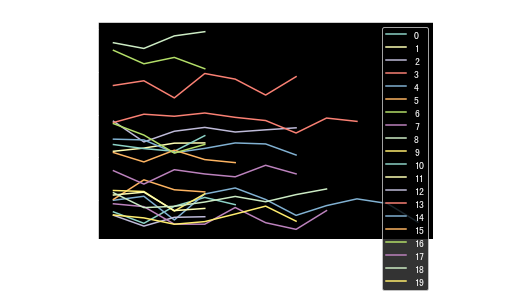

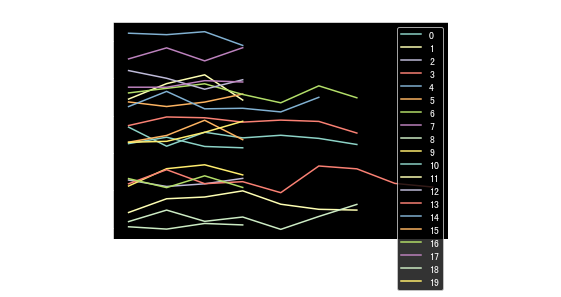

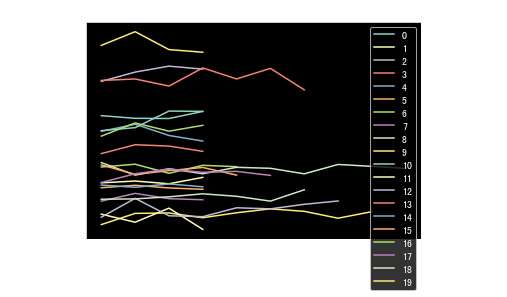

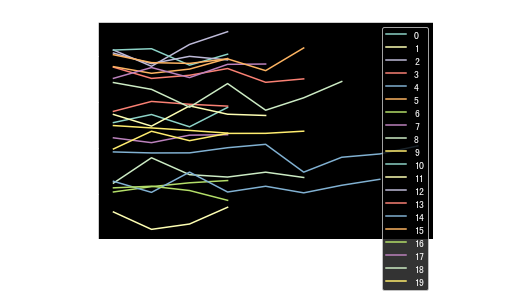

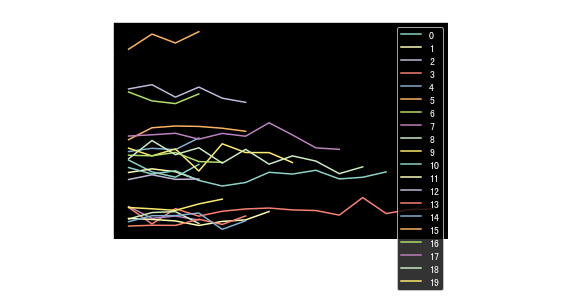

In [41]:
main_trainloss_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

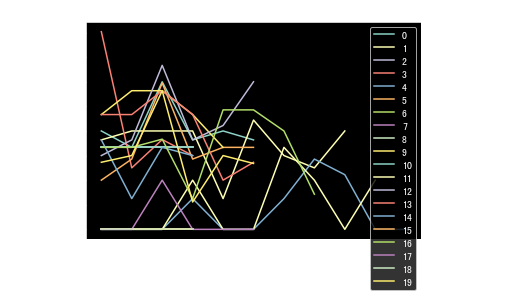

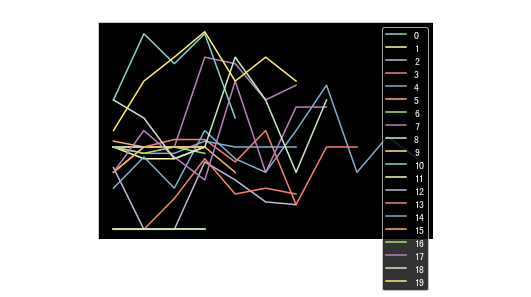

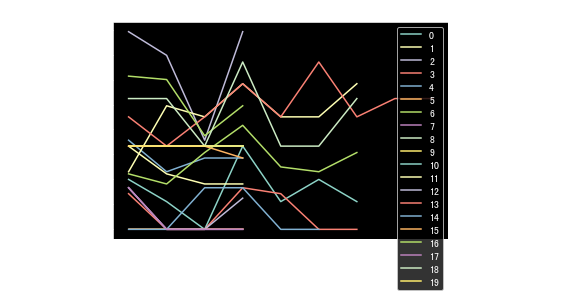

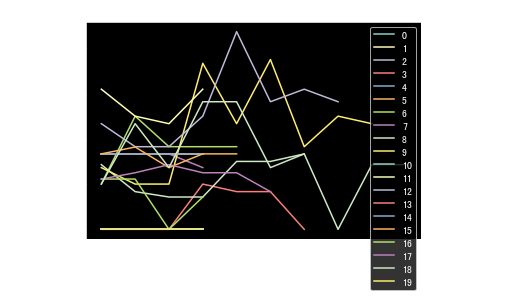

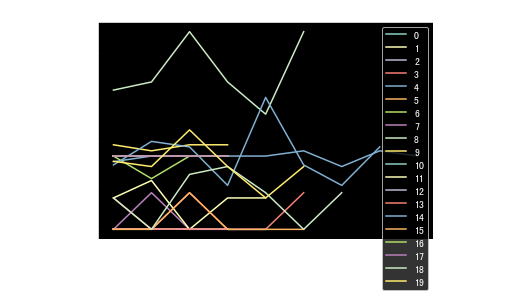

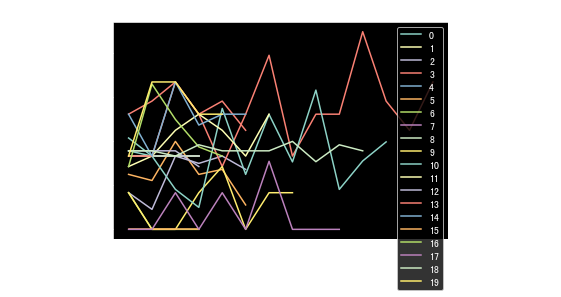

In [42]:
main_valf1_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

# 012_add_word_del_word_onlyHT_lesslr_zh_apo_query

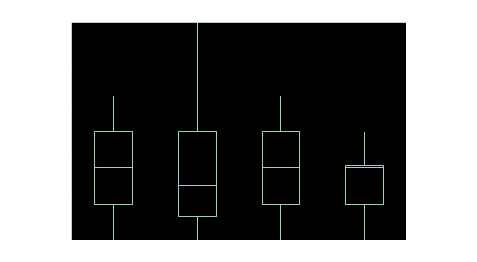

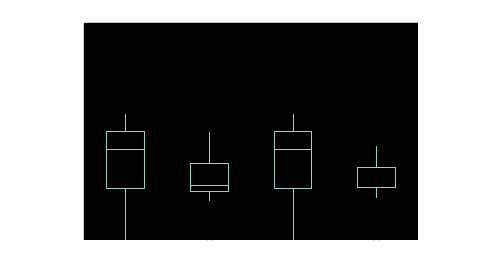

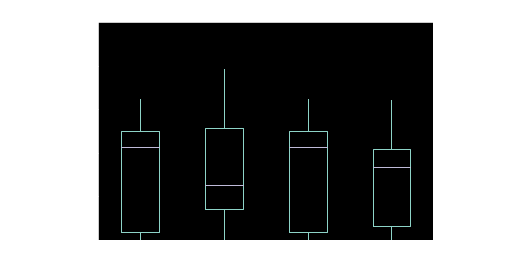

In [25]:
tgt_list = ['zh']
data_diff_type_list = ['add']
label_orientation_list = ["direct","intense","intense"]
intense_orientation_list =['','all','specific']
ver_dir = 'culdiff_save/012_add_word_del_word_onlyHT_lesslr_zh_apo_query/'
main_testresult_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

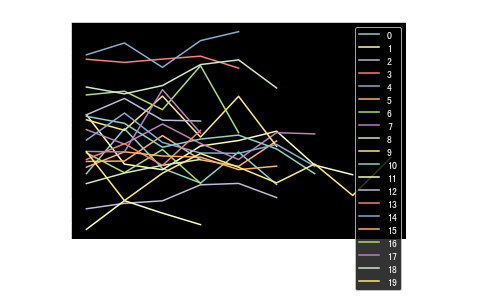

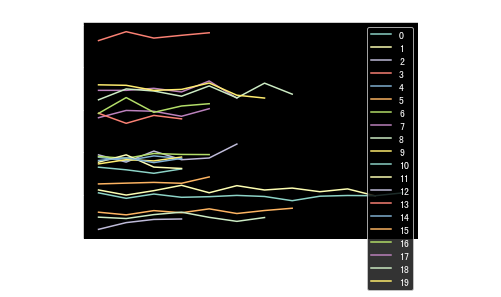

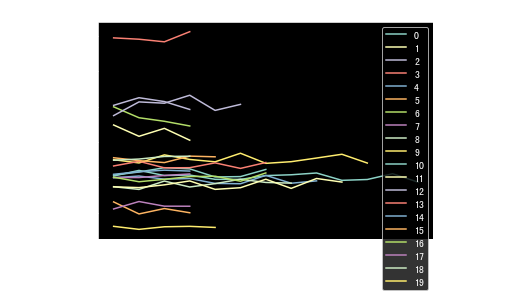

In [26]:
main_trainloss_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)

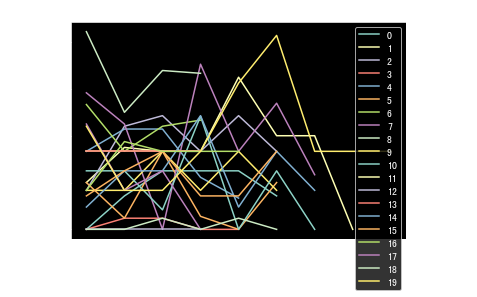

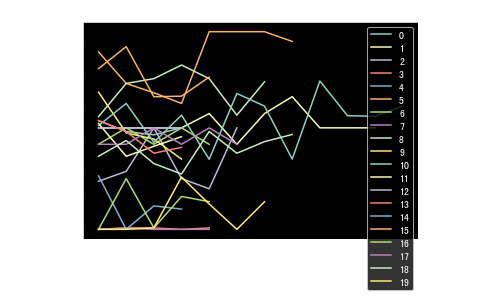

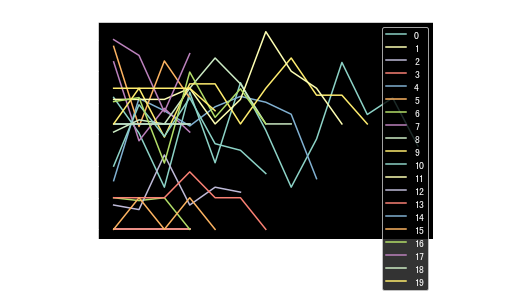

In [27]:
main_valf1_007(ver_dir,tgt_list,data_diff_type_list,label_orientation_list,intense_orientation_list)